#  Apply Granger Causality to NCRNA

In [14]:
# load the data

import pandas as pd
import numpy as np
import CausalTests as ct
reload(ct.pac)
reload(ct)
import multi_testing as mt
import geneTSmunging as gtm
reload(gtm)
import matplotlib.pyplot as plt
%matplotlib inline

filenames = ["../data/GeneExpressionData/featurecounts.genes.TPM.selected_reps.ln.surrogate_variables_corrected.ncrna.txt"]
names = ["NCRNA_TPM"]
keys = ["t00", "t05", "t1_", "t2_", "t3_", "t4_", "t5_", "t6_", "t7_", "t8_", "t10_", "t12_"]
fold_keys = []
for i in range(len(keys) - 1):
    key1 = keys[i]
    key2 = keys[i + 1]
    fold_key = key1 + "-" + key2 + " fold"
    fold_keys.append(fold_key)

diff_keys = []
for i in range(len(keys) - 1):
    key1 = keys[i]
    key2 = keys[i + 1]
    diff_key = key1 + "-" + key2 + " diff"
    diff_keys.append(diff_key)    
    
normal_diff_keys = []
for i, diff_key in zip(range(len(keys) - 1), diff_keys):
    key1 = keys[i]
    key2 = keys[i + 1]
    normal_diff_key = key1 + "-" + key2 + " normal_diff"
    normal_diff_keys.append(normal_diff_key)

datas = []
for filename in filenames:
    datas.append(gtm.load_file_and_avg(filename))
data = datas[0]
name = names[0]
print name

p_matr_dict = {}
sig_matr_dict = {}
beta_matr_dict = {}

model_orders = range(1,4)

['t00_rep1', 't00_rep2plusextra', 't00_rep3plusextra', 't00_rep4']
['t05_rep1', 't05_rep2', 't05_rep3', 't05_rep4']
['t1_rep1', 't1_rep2', 't1_rep3', 't1_rep4']
['t2_rep1', 't2_rep2', 't2_rep3', 't2_rep4']
['t3_rep1', 't3_rep2', 't3_rep3', 't3_rep4']
['t4_rep1', 't4_rep2', 't4_rep3', 't4_rep4']
['t5_rep2', 't5_rep3', 't5_rep4']
['t6_rep2', 't6_rep3', 't6_rep4']
['t7_rep1', 't7_rep2', 't7_rep3', 't7_rep4']
['t8_rep1', 't8_rep2', 't8_rep3', 't8_rep4']
['t10_rep1', 't10_rep2', 't10_rep3', 't10_rep4']
['t12_rep1', 't12_rep2', 't12_rep3', 't12_rep4']
t00 has 4 data points
t05 has 4 data points
t1_ has 4 data points
t2_ has 4 data points
t3_ has 4 data points
t4_ has 4 data points
t5_ has 3 data points
t6_ has 3 data points
t7_ has 4 data points
t8_ has 4 data points
t10_ has 4 data points
t12_ has 4 data points
NCRNA_TPM


In [ ]:
num_genes = 400
genes = data['gene'][:num_genes].values
gene_name = "Typical"

found_genes, geneTS = gtm.get_gene_TS(data, genes)
threshold = 0.05

sig_matr_list = []
p_matr_list = []



for p in model_orders:
    

    %time p_matr = ct.pairwise_granger_causality_all(geneTS, model_order=p, use_processes=True, procnum=16)

    p_matr_list.append(p_matr)
    
    sig_matr = p_matr < threshold
    
    sig_matr_list.append(sig_matr)
    
    print "For model order ", p, "# significant:", len(np.where(sig_matr)[0])


p_matr_dict[gene_name] = p_matr_list[:]
sig_matr_dict[gene_name] = sig_matr_list[:]

all_sig_matr, all_sig_num, not_sig_num = gtm.compare_sig_matr(sig_matr_list=sig_matr_list)

print "Total number of significant pairs ", all_sig_num + not_sig_num
print "Pairs significant across all matrices ", all_sig_num, all_sig_num * 1.0 / (all_sig_num + not_sig_num)




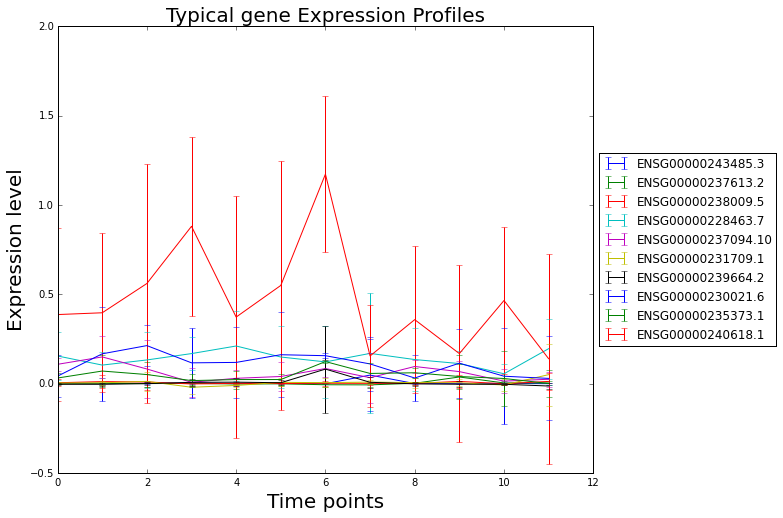

[('ENSG00000231868.1', 'ENSG00000237613.2'), ('ENSG00000237938.4', 'ENSG00000271732.1'), ('ENSG00000204362.5', 'ENSG00000236648.1')]
ENSG00000231868.1 ENSG00000237613.2
ENSG00000237938.4 ENSG00000271732.1
ENSG00000204362.5 ENSG00000236648.1


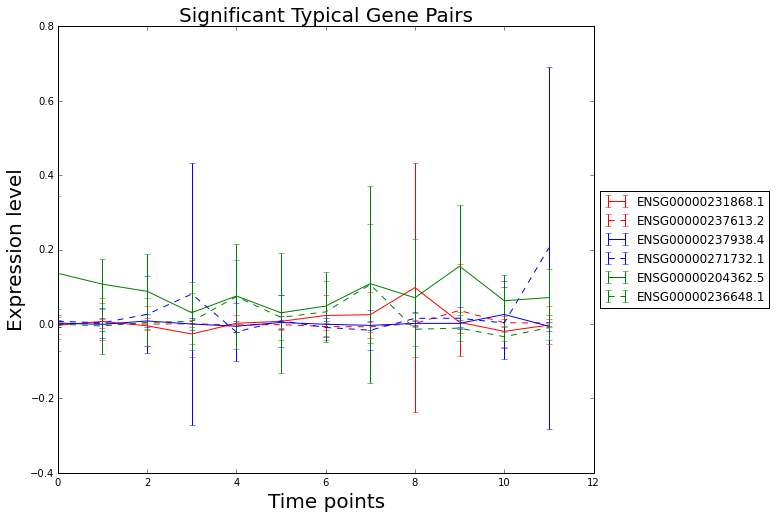

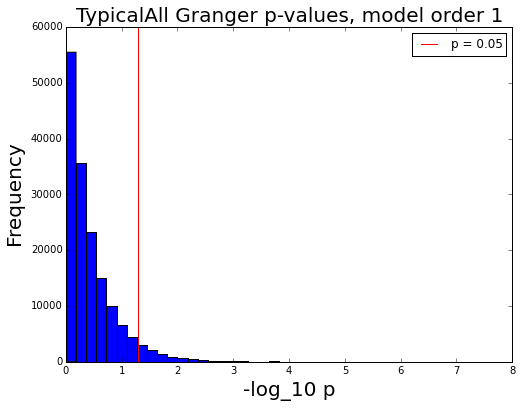

587


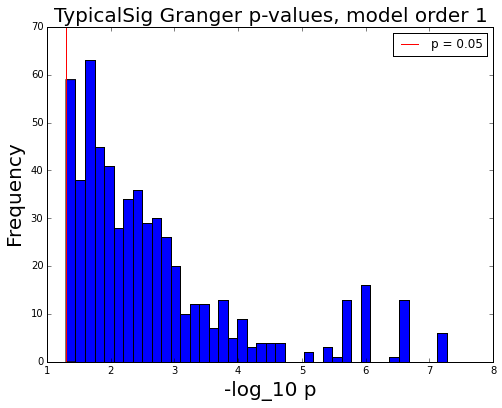

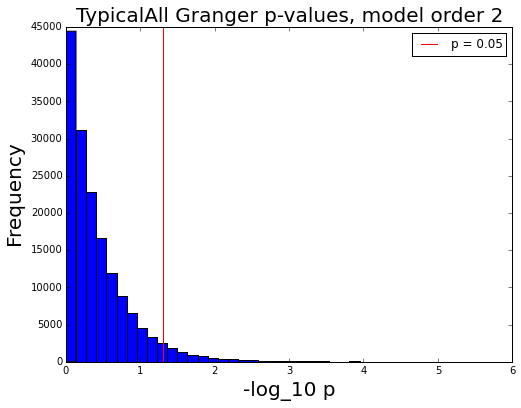

587


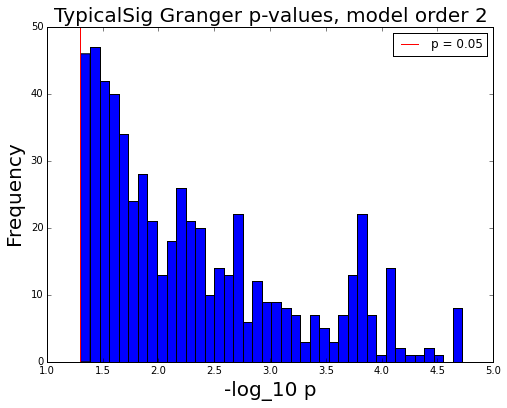

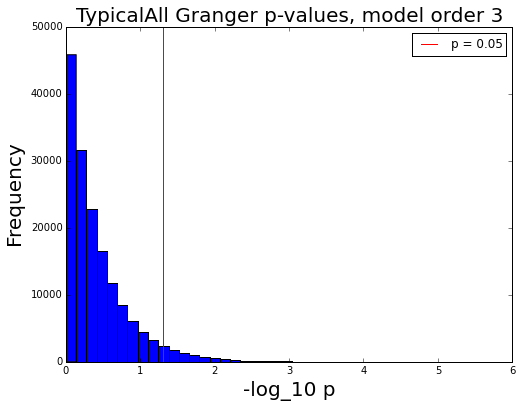

587


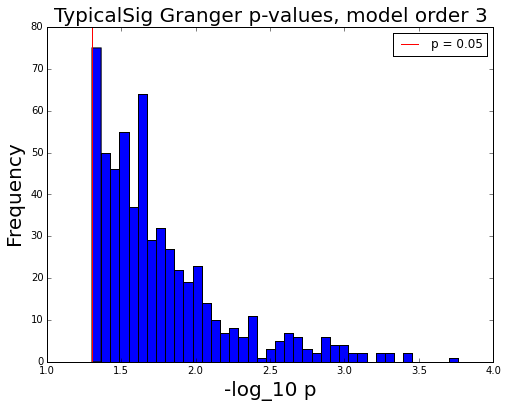

In [8]:
gene_name = "Typical"
typical_genes = found_genes[0:10]

gtm.plot_genes(data, typical_genes, title= gene_name + " gene Expression Profiles")


# Plot some of the matched, significant pairs
plot_sig_matr = all_sig_matr & (p_matr < 0.001)
gene_pairs = gtm.get_sig_gene_pairs(plot_sig_matr, found_genes)
plot_gene_pairs = gene_pairs[1:3] + gene_pairs[4:5]
print plot_gene_pairs
gtm.plot_gene_pairs(data, plot_gene_pairs, title="Significant " +gene_name + " Gene Pairs")

# Plot the p-matrix

for model_order, p_matr in zip(model_orders, p_matr_dict[gene_name]):
    all_pvalues = p_matr.flatten()

    plt.figure(figsize=(8,6))
    plt.hist(-1 * np.log10(all_pvalues), bins=40)
    plt.axvline(x=- 1 *np.log10(threshold), color='r', label='p = ' + str(threshold))
    plt.xlabel("-log_10 p", fontsize=20)
    plt.ylabel("Frequency", fontsize=20)
    plt.legend()
    plt.title(gene_name + "All Granger p-values, model order " + str(model_order), fontsize=20)
    plt.show()    
    
    
    
    sig_pvalues = p_matr[np.where(all_sig_matr)]
    print len(sig_pvalues)


    plt.figure(figsize=(8,6))
    plt.hist(-1 * np.log10(sig_pvalues), bins=40)
    plt.axvline(x=- 1 *np.log10(threshold), color='r', label='p = ' + str(threshold))
    plt.xlabel("-log_10 p", fontsize=20)
    plt.ylabel("Frequency", fontsize=20)
    plt.legend()
    plt.title(gene_name + "Sig Granger p-values, model order " + str(model_order), fontsize=20)
    plt.show()


#  Apply Granger Causality to NCRNA

In [11]:
# load the data

import pandas as pd
import numpy as np
import CausalTests as ct
reload(ct.pac)
reload(ct)
import multi_testing as mt
import geneTSmunging as gtm
reload(gtm)
import matplotlib.pyplot as plt
%matplotlib inline

filenames = ["../data/GeneExpressionData/featurecounts.genes.TPM.selected_reps.ln.surrogate_variables_corrected.ncrna.txt"]
names = ["NCRNA_TPM"]
keys = ["t00", "t05", "t1_", "t2_", "t3_", "t4_", "t5_", "t6_", "t7_", "t8_", "t10_", "t12_"]
fold_keys = []
for i in range(len(keys) - 1):
    key1 = keys[i]
    key2 = keys[i + 1]
    fold_key = key1 + "-" + key2 + " fold"
    fold_keys.append(fold_key)

diff_keys = []
for i in range(len(keys) - 1):
    key1 = keys[i]
    key2 = keys[i + 1]
    diff_key = key1 + "-" + key2 + " diff"
    diff_keys.append(diff_key)    
    
normal_diff_keys = []
for i, diff_key in zip(range(len(keys) - 1), diff_keys):
    key1 = keys[i]
    key2 = keys[i + 1]
    normal_diff_key = key1 + "-" + key2 + " normal_diff"
    normal_diff_keys.append(normal_diff_key)

datas = []
for filename in filenames:
    datas.append(gtm.load_file_and_avg(filename))
data = datas[0]
name = names[0]
print name

p_matr_dict = {}
sig_matr_dict = {}
beta_matr_dict = {}
sig_max_beta_dict = {}

model_orders = range(1,4)

['t00_rep1', 't00_rep2plusextra', 't00_rep3plusextra', 't00_rep4']
['t05_rep1', 't05_rep2', 't05_rep3', 't05_rep4']
['t1_rep1', 't1_rep2', 't1_rep3', 't1_rep4']
['t2_rep1', 't2_rep2', 't2_rep3', 't2_rep4']
['t3_rep1', 't3_rep2', 't3_rep3', 't3_rep4']
['t4_rep1', 't4_rep2', 't4_rep3', 't4_rep4']
['t5_rep2', 't5_rep3', 't5_rep4']
['t6_rep2', 't6_rep3', 't6_rep4']
['t7_rep1', 't7_rep2', 't7_rep3', 't7_rep4']
['t8_rep1', 't8_rep2', 't8_rep3', 't8_rep4']
['t10_rep1', 't10_rep2', 't10_rep3', 't10_rep4']
['t12_rep1', 't12_rep2', 't12_rep3', 't12_rep4']
t00 has 4 data points
t05 has 4 data points
t1_ has 4 data points
t2_ has 4 data points
t3_ has 4 data points
t4_ has 4 data points
t5_ has 3 data points
t6_ has 3 data points
t7_ has 4 data points
t8_ has 4 data points
t10_ has 4 data points
t12_ has 4 data points
NCRNA_TPM


# Include Beta matrix

In [12]:
num_genes = 100
genes = data['gene'][:num_genes].values
gene_name = "Typical"

found_genes, geneTS = gtm.get_gene_TS(data, genes)
threshold = 0.05

sig_matr_list = []
p_matr_list = []
beta_matr_list = []


print "Gene number ", len(found_genes)
for p in model_orders:
    

    %time p_matr, beta_matr = ct.pairwise_granger_causality_all(geneTS, model_order=p, use_processes=False, procnum=16)

    p_matr_list.append(p_matr)
    
    beta_matr_list.append(beta_matr)
    
    sig_matr = p_matr < threshold
    
    sig_matr_list.append(sig_matr)
    
    print "For model order ", p, "# significant:", len(np.where(sig_matr)[0])


p_matr_dict[gene_name] = p_matr_list[:]
sig_matr_dict[gene_name] = sig_matr_list[:]
beta_matr_dict[gene_name] = beta_matr_list[:]

all_sig_matr, all_sig_num, not_sig_num = gtm.compare_sig_matr(sig_matr_list=sig_matr_list)

print "Total number of significant pairs ", all_sig_num + not_sig_num
print "Pairs significant across all matrices ", all_sig_num, all_sig_num * 1.0 / (all_sig_num + not_sig_num)




Gene number  100
CPU times: user 10.6 s, sys: 90.7 ms, total: 10.7 s
Wall time: 10.8 s
For model order  1 # significant: 587
CPU times: user 12.9 s, sys: 412 ms, total: 13.3 s
Wall time: 14.6 s
For model order  2 # significant: 525
CPU times: user 12.5 s, sys: 214 ms, total: 12.7 s
Wall time: 13.6 s
For model order  3 # significant: 499
Total number of significant pairs  1276
Pairs significant across all matrices  52 0.0407523510972


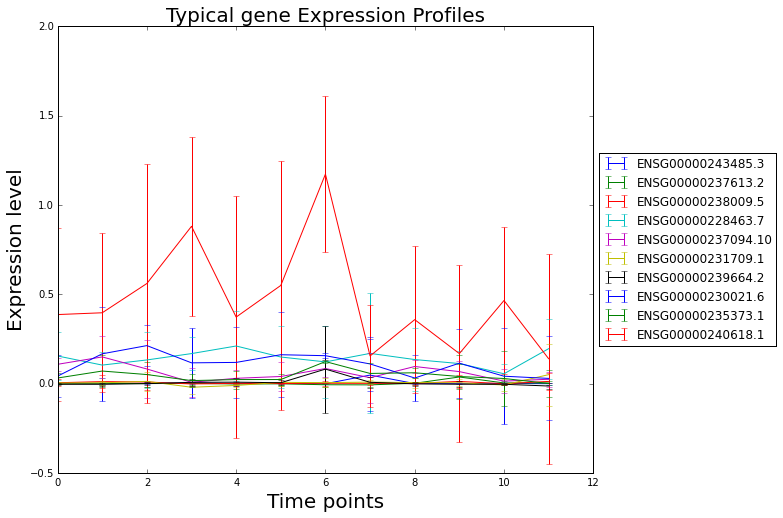

[]


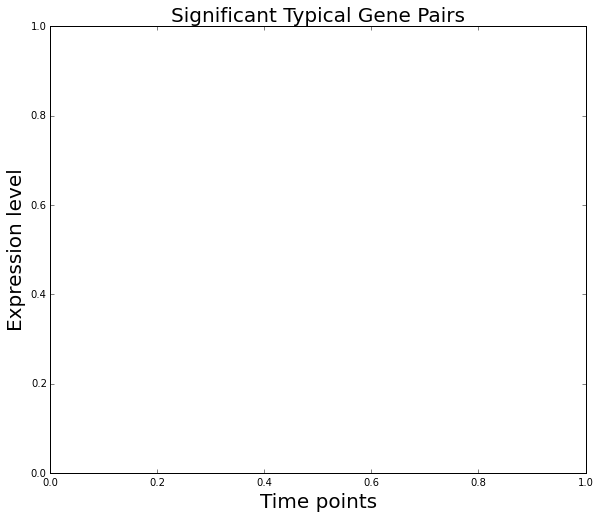

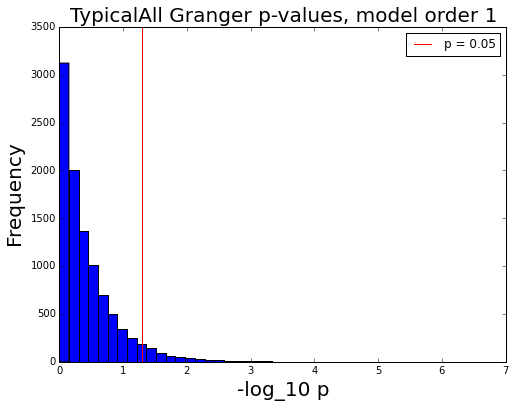

Shape is (100, 100, 1)


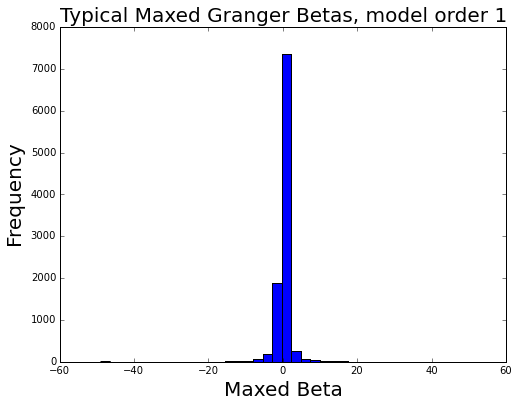

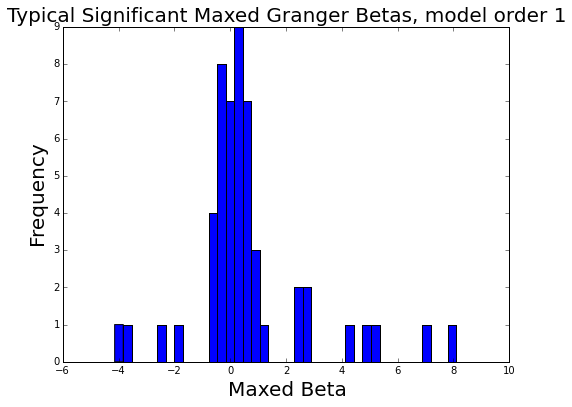

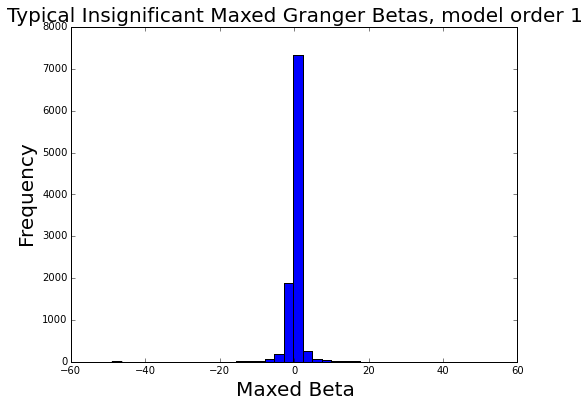

52


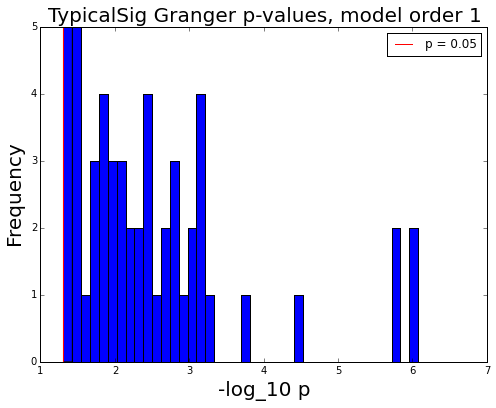

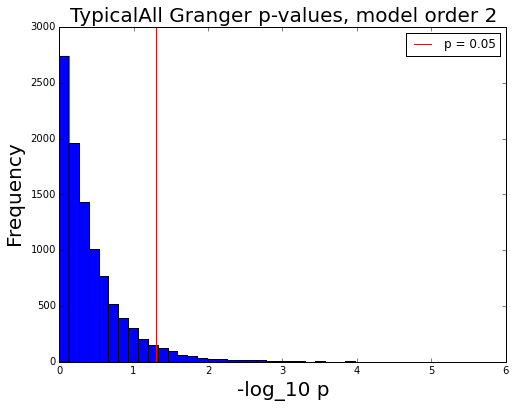

Shape is (100, 100, 2)


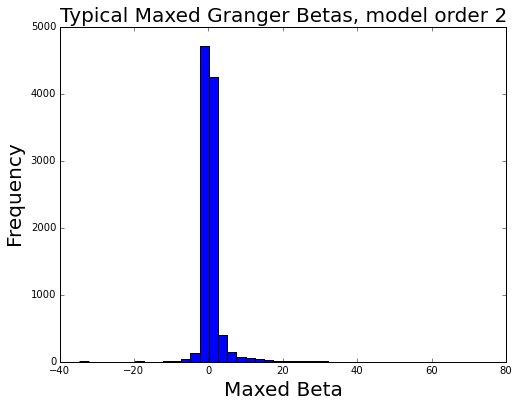

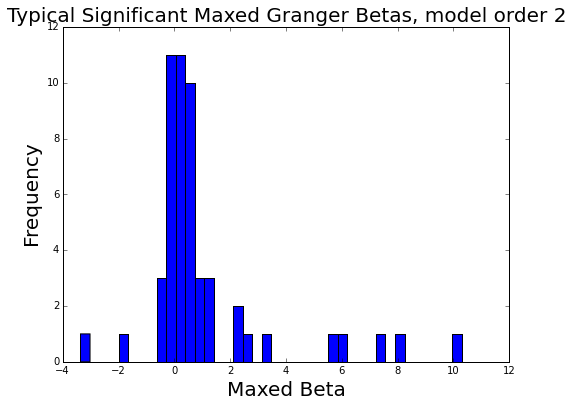

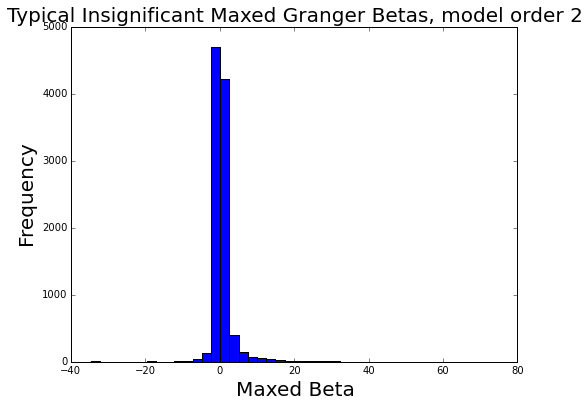

52


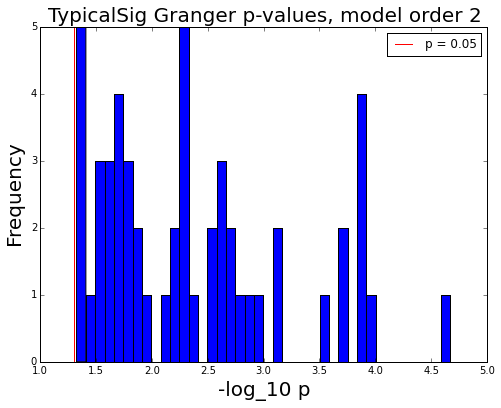

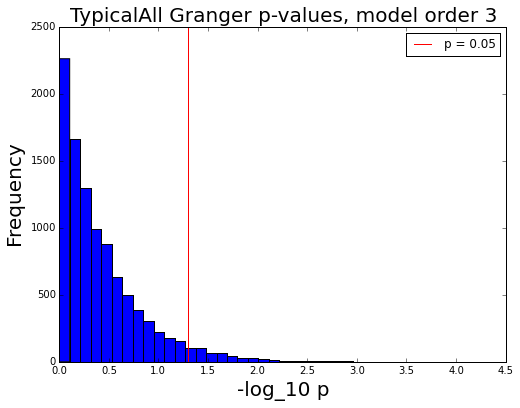

Shape is (100, 100, 3)


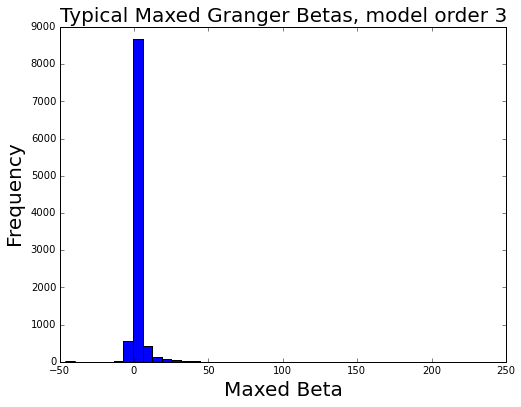

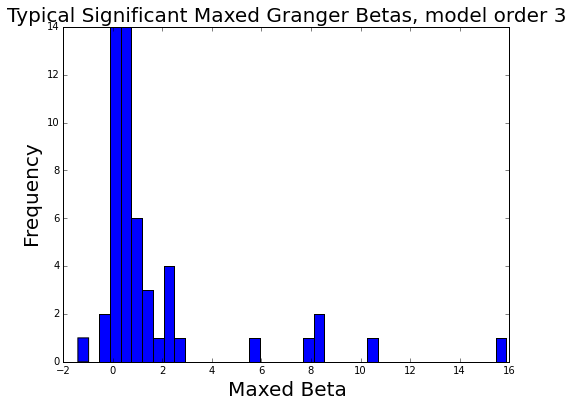

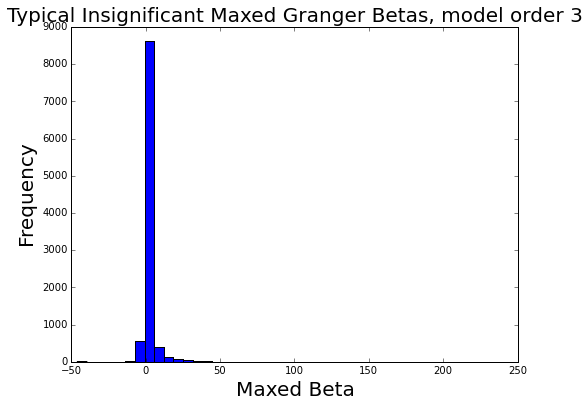

52


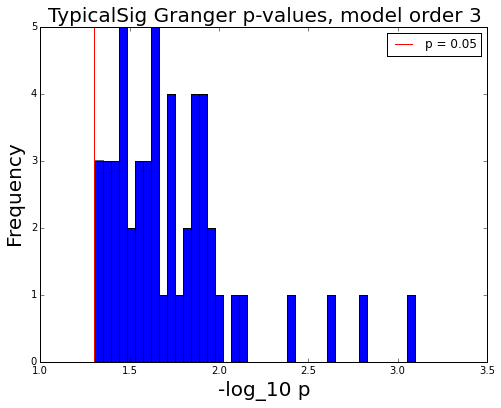

In [15]:
gene_name = "Typical"
typical_genes = found_genes[0:10]

gtm.plot_genes(data, typical_genes, title= gene_name + " gene Expression Profiles")


# Plot some of the matched, significant pairs
plot_sig_matr = all_sig_matr & (p_matr < 0.001)
gene_pairs = gtm.get_sig_gene_pairs(plot_sig_matr, found_genes)
plot_gene_pairs = gene_pairs[1:3] + gene_pairs[4:5]
print plot_gene_pairs
gtm.plot_gene_pairs(data, plot_gene_pairs, title="Significant " +gene_name + " Gene Pairs")

# Plot the p-matrix

for model_order, p_matr, beta_matr in zip(model_orders, p_matr_dict[gene_name], beta_matr_dict[gene_name]):
    all_pvalues = p_matr.flatten()

    plt.figure(figsize=(8,6))
    plt.hist(-1 * np.log10(all_pvalues), bins=40)
    plt.axvline(x=- 1 *np.log10(threshold), color='r', label='p = ' + str(threshold))
    plt.xlabel("-log_10 p", fontsize=20)
    plt.ylabel("Frequency", fontsize=20)
    plt.legend()
    plt.title(gene_name + "All Granger p-values, model order " + str(model_order), fontsize=20)
    plt.show()    
    
    print "Shape is", beta_matr.shape
    
    #take the average beta values
#     avg_betas = np.average(beta_matr, axis=2).flatten()
#     plt.figure(figsize=(8,6))
#     plt.hist(avg_betas, bins=40)
#     plt.xlabel("Average Beta", fontsize=20)
#     plt.ylabel("Frequency", fontsize=20)
#     plt.legend()
#     plt.title(gene_name + " Average Granger Betas, model order " + str(model_order), fontsize=20)
#     plt.show()      
    
    
    # take the max beta values
    max_betas = np.max(beta_matr, axis=2).flatten()
    plt.figure(figsize=(8,6))
    plt.hist(max_betas, bins=40)
    plt.xlabel("Maxed Beta", fontsize=20)
    plt.ylabel("Frequency", fontsize=20)
    plt.legend()
    plt.title(gene_name + " Maxed Granger Betas, model order " + str(model_order), fontsize=20)
    plt.show() 
    
    
    # take the significant max beta values
    sig_indices = np.where(all_sig_matr)
    sig_max_betas = np.max(beta_matr, axis=2)[sig_indices]
    plt.figure(figsize=(8,6))
    plt.hist(sig_max_betas, bins=40)
    plt.xlabel("Maxed Beta", fontsize=20)
    plt.ylabel("Frequency", fontsize=20)
    plt.legend()
    plt.title(gene_name + " Significant Maxed Granger Betas, model order " + str(model_order), fontsize=20)
    plt.show() 
    
    
    if model_order == 3:
        typical_sig_max_betas = sig_max_betas.copy()
    
    # take the insignificant max beta values
    insig_indices = np.where(~ all_sig_matr)
    insig_max_betas = np.max(beta_matr, axis=2)[insig_indices]
    plt.figure(figsize=(8,6))
    plt.hist(insig_max_betas, bins=40)
    plt.xlabel("Maxed Beta", fontsize=20)
    plt.ylabel("Frequency", fontsize=20)
    plt.legend()
    plt.title(gene_name + " Insignificant Maxed Granger Betas, model order " + str(model_order), fontsize=20)
    plt.show() 
    
    
    
    
    
    sig_pvalues = p_matr[np.where(all_sig_matr)]
    print len(sig_pvalues)


    plt.figure(figsize=(8,6))
    plt.hist(-1 * np.log10(sig_pvalues), bins=40)
    plt.axvline(x=- 1 *np.log10(threshold), color='r', label='p = ' + str(threshold))
    plt.xlabel("-log_10 p", fontsize=20)
    plt.ylabel("Frequency", fontsize=20)
    plt.legend()
    plt.title(gene_name + "Sig Granger p-values, model order " + str(model_order), fontsize=20)
    plt.show()


## As baseline, see how many causal genes are in random

In [16]:
num_genes = 100
gene_name = "Random"

genes = data['gene'][:num_genes].values


found_genes, geneTS = gtm.get_gene_TS(data, genes)

seeds = range(1)

sig_tuples = []
rand_sig_pvalues = []

for seed in seeds:
    np.random.seed(seed)
    rand_geneTS = gtm.randomize_geneTS(geneTS)



    threshold = 0.05

    p_matr_list = []
    sig_matr_list = []

        
    for p in model_orders:
    

        %time p_matr, beta_matr = ct.pairwise_granger_causality_all(geneTS, model_order=p, use_processes=True, procnum=16)

        p_matr_list.append(p_matr)

        sig_matr = p_matr < threshold

        sig_matr_list.append(sig_matr)

        print "For model order ", p, "# significant:", len(np.where(sig_matr)[0])
    
    p_matr_dict[gene_name] = p_matr_list[:]
    sig_matr_dict[gene_name] = sig_matr_list[:]
    
    all_sig_matr, all_sig_num, not_sig_num = gtm.compare_sig_matr(sig_matr_list=sig_matr_list)

    print "Total number of significant pairs ", all_sig_num + not_sig_num
    print "Pairs significant across all matrices ", all_sig_num, all_sig_num * 1.0 / (all_sig_num + not_sig_num)

    sig_tuples.append([all_sig_num + not_sig_num, all_sig_num, all_sig_num * 1.0 / (all_sig_num + not_sig_num)])
    
    rand_sig_pvalues.extend(p_matr[np.where(all_sig_matr)])


zipped_tuples = zip(*sig_tuples)

total_sigs, all_sigs, all_sigs_ratios = zipped_tuples[0], zipped_tuples[1], zipped_tuples[2]

print "Total significant", total_sigs
print "All significant", all_sigs
print "All significant ratios", all_sigs_ratios
    # print this out in an understandable format: write causes, effects, and p-values to a file?

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(99, 89), (99, 90), (99, 91), (99, 92), (99, 93), (99, 94), (99, 95), (99, 96), (99, 97), (99, 98)]
time to partition inputs  0.000134229660034
Time to prepare function args  7.39097595215e-05
Pool initialized at  13:05:43
number of processes:  16
Mapping begun at  13:05:43


ValueError: setting an array element with a sequence.

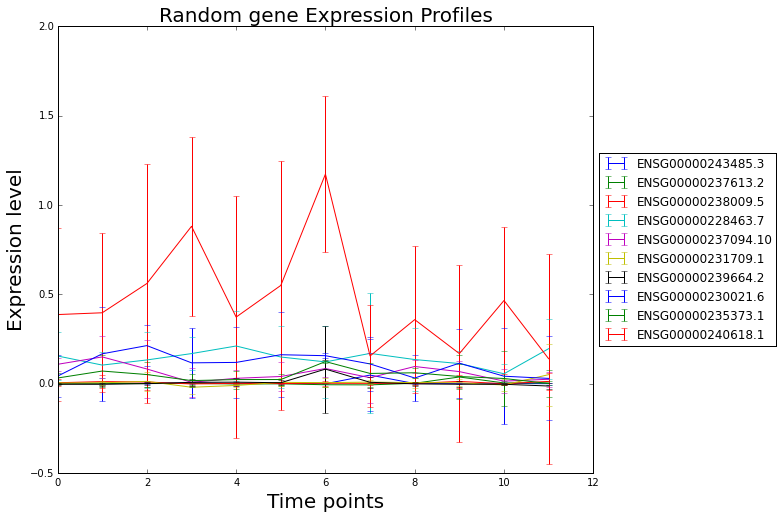

[('ENSG00000230615.5', 'ENSG00000237188.3')]
ENSG00000230615.5 ENSG00000237188.3


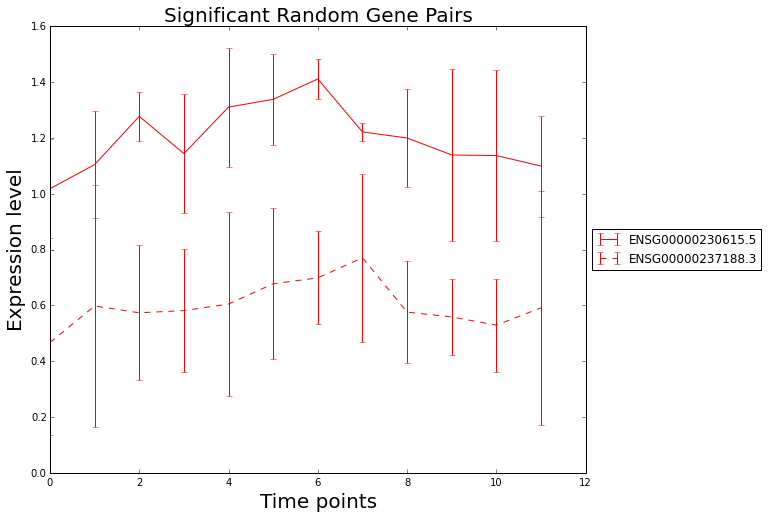

587


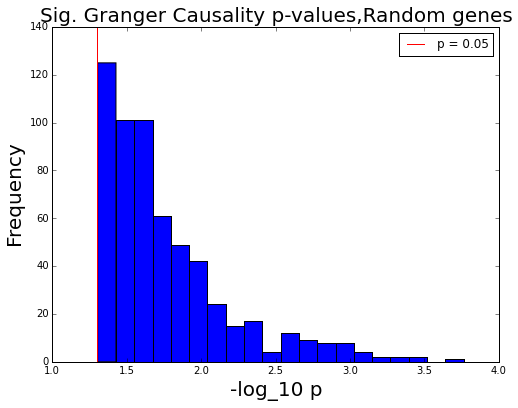

In [10]:
gene_name = "Random"
typical_genes = found_genes[0:10]

gtm.plot_genes(data, typical_genes, title= gene_name + " gene Expression Profiles")


# Plot some of the matched, significant pairs
plot_sig_matr = all_sig_matr & (p_matr < 0.0003)
gene_pairs = gtm.get_sig_gene_pairs(plot_sig_matr, found_genes)
plot_gene_pairs = gene_pairs[0:3]
print plot_gene_pairs
gtm.plot_gene_pairs(data, plot_gene_pairs, title="Significant " +gene_name + " Gene Pairs")

# Plot the p-matrix


sig_pvalues = p_matr[np.where(all_sig_matr)]
print len(sig_pvalues)


plt.figure(figsize=(8,6))
plt.hist(-1 * np.log10(sig_pvalues), bins=20)
plt.axvline(x=- 1 *np.log10(threshold), color='r', label='p = ' + str(threshold))
plt.xlabel("-log_10 p", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.legend()
plt.title("Sig. Granger Causality p-values," + gene_name + " genes", fontsize=20)
plt.show()


all_rand_null_pvalues = p_matr.flatten()





# Get the variance of the timepoints and timepoints' fold changes

In [14]:
for name, data in zip(names, datas):
    print name
    print data[keys].describe()

NCRNA_TPM
               t00          t05          t1_          t2_          t3_  \
count  8141.000000  8141.000000  8141.000000  8141.000000  8141.000000   
mean      0.374173     0.372149     0.370078     0.361485     0.361332   
std       0.646110     0.649867     0.646704     0.643174     0.645214   
min      -0.096345    -0.123647    -0.157804    -0.307961    -0.224479   
25%       0.005385     0.001911     0.003457     0.004465     0.003002   
50%       0.086067     0.087054     0.082678     0.075138     0.078944   
75%       0.446855     0.448734     0.442504     0.417011     0.418876   
max       6.430718     6.204473     5.701680     6.105167     6.270800   

               t4_          t5_          t6_          t7_          t8_  \
count  8141.000000  8141.000000  8141.000000  8141.000000  8141.000000   
mean      0.363938     0.361931     0.353692     0.351598     0.349269   
std       0.640396     0.645585     0.644294     0.631352     0.629513   
min      -0.107400    -0.18

# Look at fold keys

In [15]:
data[fold_keys].describe()

,t00-t05 fold,t05-t1_ fold,t1_-t2_ fold,t2_-t3_ fold,t3_-t4_ fold,t4_-t5_ fold,t5_-t6_ fold,t6_-t7_ fold,t7_-t8_ fold,t8_-t10_ fold,t10_-t12_ fold
count,8141.000000,8141.000000,8141.000000,8141.000000,8141.000000,8141.000000,8141.000000,8141.000000,8141.000000,8141.000000,8141.000000
mean,1.646604,-0.017602,1.892243,-3.497193,11.034148,0.994475,0.323694,0.504401,45.940666,0.788024,1.524481
std,43.811525,46.897580,682.432394,360.960470,866.113120,35.134966,42.779504,21.977876,788.895924,25.981032,114.380288
min,-1852.652175,-1595.319268,-40931.151157,-32201.668665,-382.252053,-2242.822955,-1961.356270,-992.493384,-1557.412957,-536.110057,-5295.614906
25%,0.277192,-0.052441,0.104482,0.111434,-0.044136,0.340614,0.435177,-0.144574,0.352938,0.131088,0.093570
50%,0.934498,0.819037,0.829957,0.829080,0.813087,0.949058,0.929283,0.689787,0.958403,0.882174,0.914751
75%,1.268593,1.243433,1.170517,1.194849,1.175141,1.547910,1.301953,1.115730,1.419883,1.303280,1.405406
max,2372.316228,2124.092809,45588.441903,1217.297037,78108.053862,576.906929,1530.951676,524.498744,13964.379785,1510.438368,7857.773144


# get the genes with the highest fold changes. Top 0.1% at each point
# apply granger then

In [16]:

change_indices = (data[fold_keys] > data[fold_keys].quantile(.999)).T.any() | (data[fold_keys] < data[fold_keys].quantile(.001)).T.any() 
change_genes = data['gene'][change_indices]

found_genes, geneTS = gtm.get_gene_TS(data, change_genes)
print len(found_genes)

196


[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(195, 185), (195, 186), (195, 187), (195, 188), (195, 189), (195, 190), (195, 191), (195, 192), (195, 193), (195, 194)]
time to partition inputs  0.000503063201904
Time to prepare function args  8.58306884766e-05
Process  17782 number  0 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56
Process  17783 number  1 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56
Process  17784 number  2 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Pool initialized at  17:56:56
Mapping begun at  17:56:56
Process  17785 number  3 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56
Process  17786 number  4 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17788 number  6 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17787 number  5 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17790 number  8 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56
Process  17789 number  7 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17791 number  9 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56
Process  17792 number  10 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17795 number  13 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56
Process  17793 number  11 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56
Process  17794 number  12 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17796 number  14 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17797 number  15 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:56:56


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17782 number  0 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:13
Process  17787 number  5 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:14
Process  17792 number  10 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:14
Process  17797 number  15 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:14
Process  17784 number  2 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:14
Process  17790 number  8 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:14
Process  17783 number  1 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:14
Process  17791 number  9 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:14
Proces

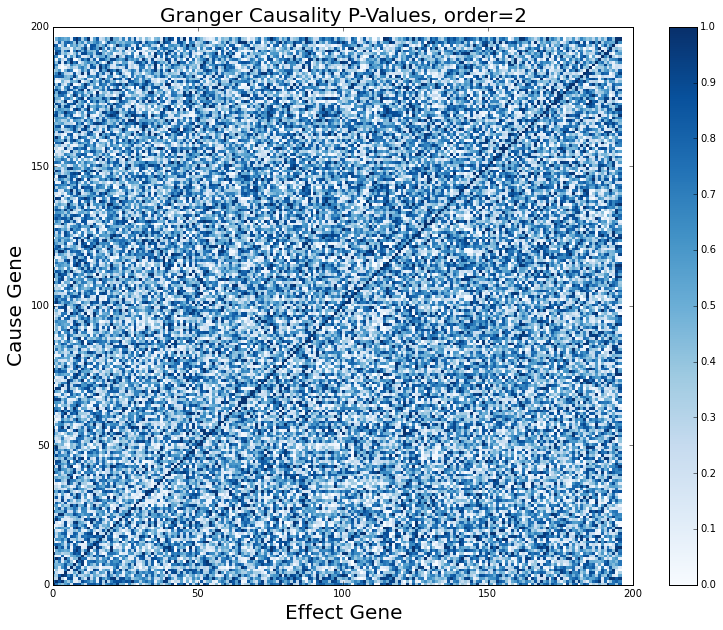

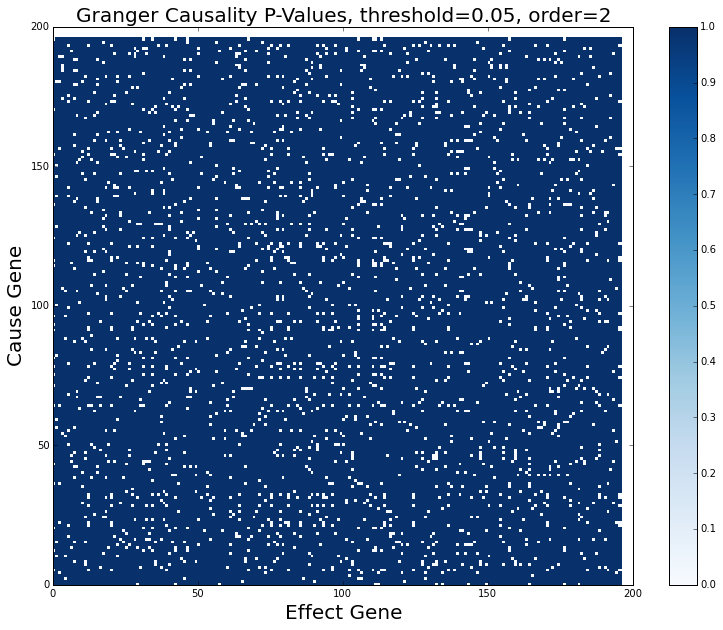

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(195, 185), (195, 186), (195, 187), (195, 188), (195, 189), (195, 190), (195, 191), (195, 192), (195, 193), (195, 194)]
time to partition inputs  0.000416994094849
Time to prepare function args  7.60555267334e-05
Process  17799 number  0 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19
Process  17800 number  1 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17802 number  3 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17801 number  2 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19
Process  17805 number  6 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19
Process  17804 number  5 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19
Process  17803 number  4 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17806 number  7 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19
Process  17809 number  10 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17807 number  8 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19
Process  17811 number  12 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19
Pool initialized at  17:57:19
Mapping begun at  17:57:19
Process  17808 number  9 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19
Process  17810 number  11 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17812 number  13 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19
Process  17813 number  14 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19
Process  17814 number  15 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  17:57:19


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17814 number  15 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:36
Process  17808 number  9 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:36
Process  17801 number  2 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:36
Process  17800 number  1 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:36
Process  17811 number  12 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:36
Process  17804 number  5 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:36
Process  17805 number  6 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:36
Process  17799 number  0 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  17:57:36
Proces

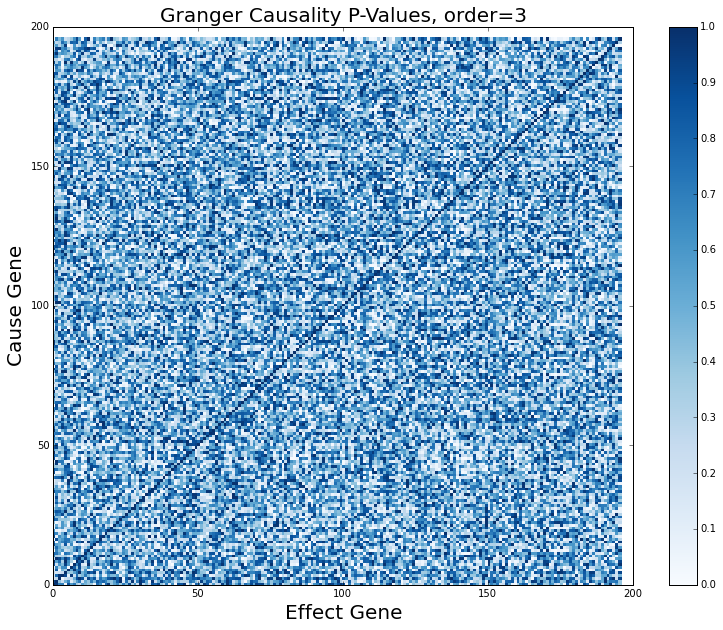

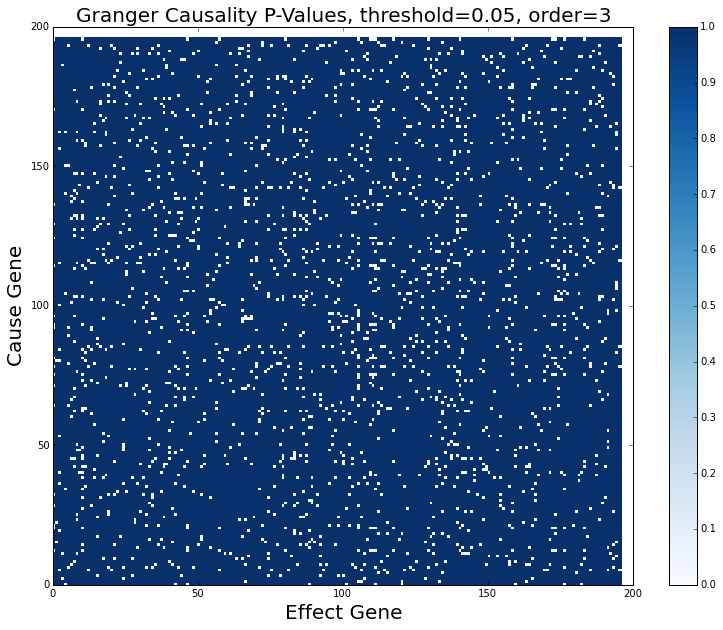

Total number of significant pairs  3762
Pairs significant across all matrices  463 0.123072833599


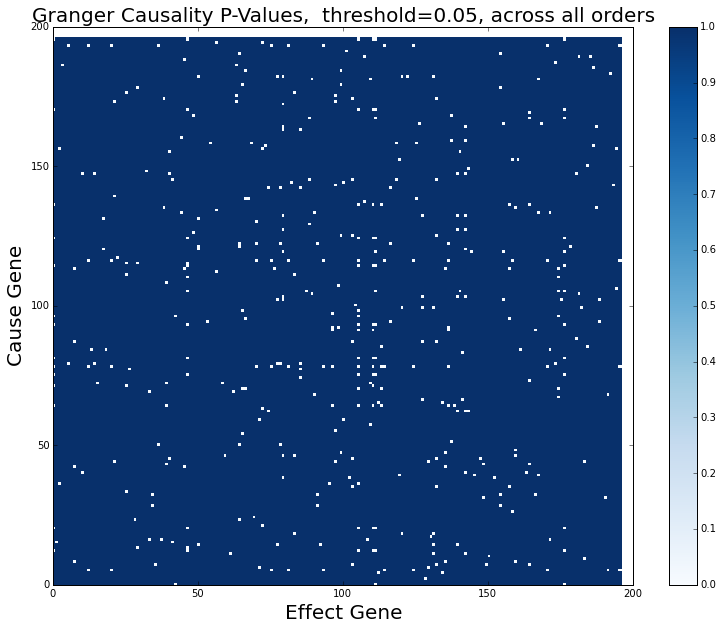

In [17]:
threshold = 0.05

sig_matr_list = []



for p in range(2,4):


    %time p_matr = ct.pairwise_granger_causality_all(geneTS, model_order=p, use_processes=True, procnum=16)

    sig_matr = p_matr < threshold
    
    sig_matr_list.append(sig_matr)
    
    print "P-values at p = ", p
    print p_matr
    plt.figure(figsize=(13,10))
    heatmap = plt.pcolor(p_matr , cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title("Granger Causality P-Values, order=" + str(p), fontsize=20)
    plt.xlabel("Effect Gene", fontsize=20)
    plt.ylabel("Cause Gene", fontsize=20)
    plt.show()

    
    plt.figure(figsize=(13,10))
    heatmap = plt.pcolor(1 - sig_matr, cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title("Granger Causality P-Values, threshold=" + str(threshold) + ", order=" + str(p), fontsize=20)
    plt.xlabel("Effect Gene", fontsize=20)
    plt.ylabel("Cause Gene", fontsize=20)
    plt.show()

all_sig_matr, all_sig_num, not_sig_num = gtm.compare_sig_matr(sig_matr_list=sig_matr_list)

print "Total number of significant pairs ", all_sig_num + not_sig_num
print "Pairs significant across all matrices ", all_sig_num, all_sig_num * 1.0 / (all_sig_num + not_sig_num)


plt.figure(figsize=(13,10))
heatmap = plt.pcolor(1 - all_sig_matr, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Granger Causality P-Values,  threshold=" + str(threshold) + ", across all orders", fontsize=20)
plt.xlabel("Effect Gene", fontsize=20)
plt.ylabel("Cause Gene", fontsize=20)
plt.show()

# print this out in an understandable format: write causes, effects, and p-values to a file?

# get sig p-values

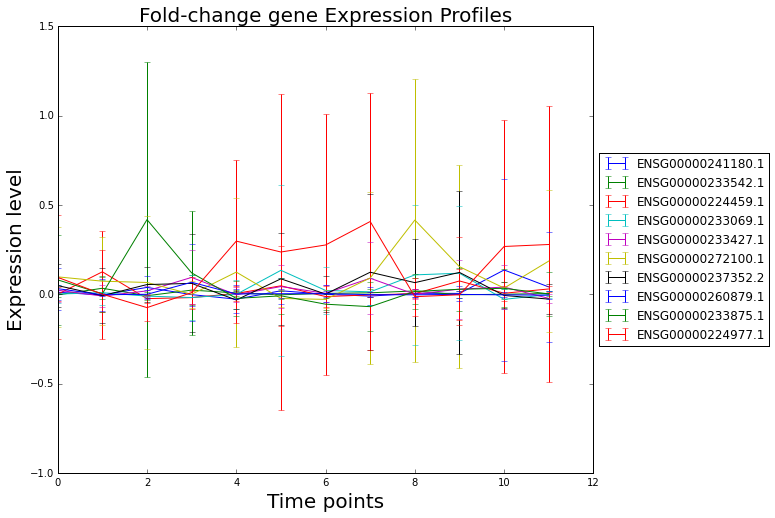

[('ENSG00000229401.1', 'ENSG00000248605.4'), ('ENSG00000271931.1', 'ENSG00000228100.1')]
ENSG00000229401.1 ENSG00000248605.4
ENSG00000271931.1 ENSG00000228100.1


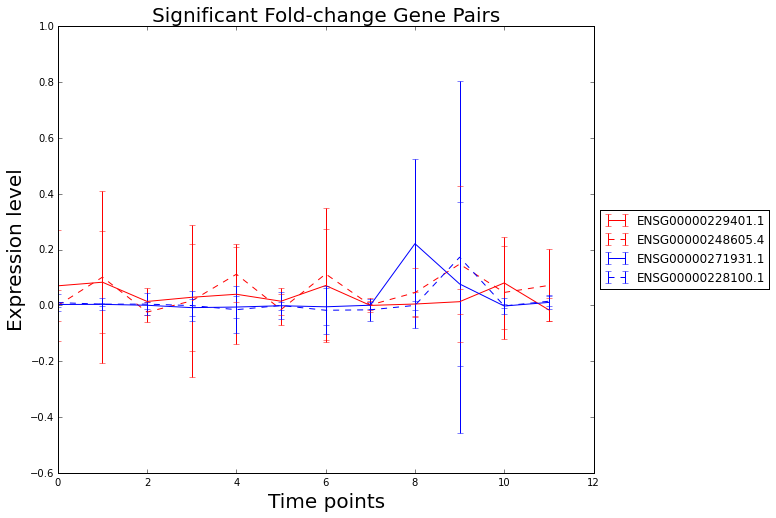

463


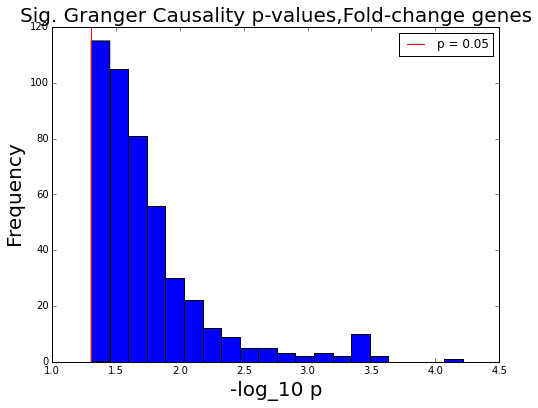

In [26]:
gene_name = "Fold-change"
typical_genes = found_genes[0:10]

gtm.plot_genes(data, typical_genes, title= gene_name + " gene Expression Profiles")


# Plot some of the matched, significant pairs
plot_sig_matr = all_sig_matr & (p_matr < 0.001)
gene_pairs = gtm.get_sig_gene_pairs(plot_sig_matr, found_genes)
plot_gene_pairs = gene_pairs[0:1] + gene_pairs[2:3]
print plot_gene_pairs
gtm.plot_gene_pairs(data, plot_gene_pairs, title="Significant " +gene_name + " Gene Pairs")

# Plot the p-matrix


sig_pvalues = p_matr[np.where(all_sig_matr)]
print len(sig_pvalues)


plt.figure(figsize=(8,6))
plt.hist(-1 * np.log10(sig_pvalues), bins=20)
plt.axvline(x=- 1 *np.log10(threshold), color='r', label='p = ' + str(threshold))
plt.xlabel("-log_10 p", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.legend()
plt.title("Sig. Granger Causality p-values," + gene_name + " genes", fontsize=20)
plt.show()

# Multi-fold change genes

In [ ]:
data[fold_keys].describe()

In [27]:
import os
most_change_indices = (data[fold_keys] > data[fold_keys].quantile(.90)).T.sum() + (data[fold_keys] < data[fold_keys].quantile(.1)).T.sum()
print (data[fold_keys] > data[fold_keys].quantile(.90)).T.sum().describe()
print (data[fold_keys] < data[fold_keys].quantile(.1)).T.sum().describe()
print len(np.where(most_change_indices > 7)[0])
os.system("say 'We're finished here'")

count    8141.000000
mean        1.099865
std         1.094537
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         6.000000
dtype: float64
count    8141.000000
mean        1.099865
std         1.340899
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         6.000000
dtype: float64
0


512

In [28]:
most_change_genes = data['gene'][most_change_indices > 5]

found_genes, geneTS = gtm.get_gene_TS(data, most_change_genes)
print len(found_genes)

277


[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(276, 266), (276, 267), (276, 268), (276, 269), (276, 270), (276, 271), (276, 272), (276, 273), (276, 274), (276, 275)]
time to partition inputs  0.00124096870422
Time to prepare function args  0.000171899795532
Process  17830 number  0 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17831 number  1 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17832 number  2 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58
Process  17833 number  3 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58
Pool initialized at  18:01:58
Mapping begun at  18:01:58
Process  17834 number  4 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17836 number  6 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58
Process  17835 number  5 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17837 number  7 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58
Process  17838 number  8 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17839 number  9 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17840 number  10 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17841 number  11 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58
Process  17842 number  12 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58
Process  17843 number  13 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17844 number  14 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17845 number  15 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:01:58


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17833 number  3 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:02:32
Process  17837 number  7 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:02:32
Process  17835 number  5 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:02:32
Process  17831 number  1 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:02:32
Process  17830 number  0 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:02:32
Process  17834 number  4 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:02:32
Process  17840 number  10 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:02:32
Process  17838 number  8 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:02:32
Process

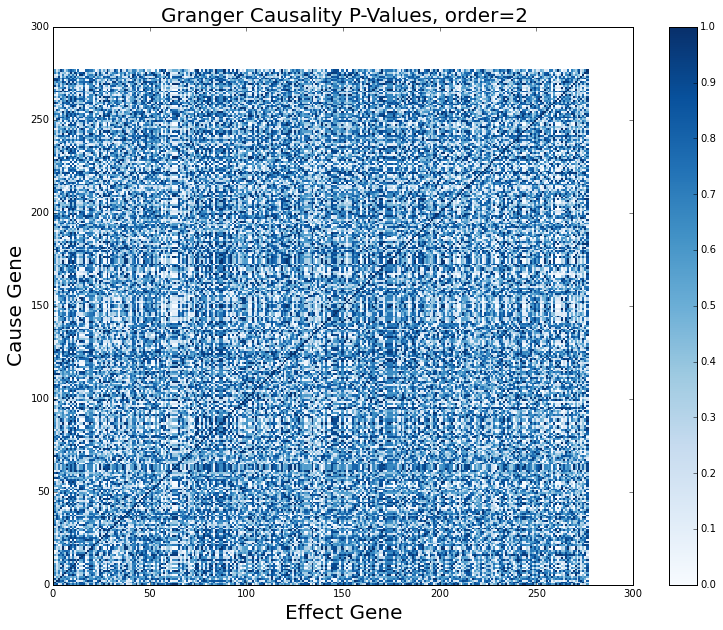

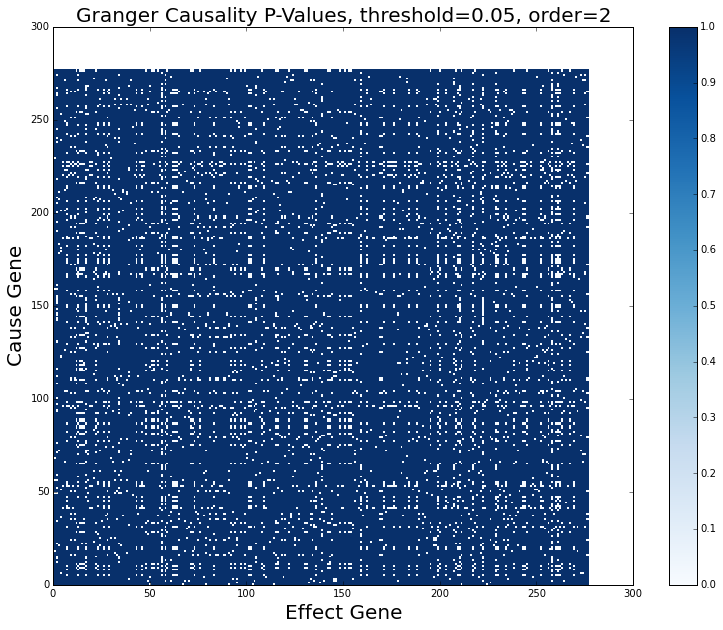

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(276, 266), (276, 267), (276, 268), (276, 269), (276, 270), (276, 271), (276, 272), (276, 273), (276, 274), (276, 275)]
time to partition inputs  0.000994920730591
Time to prepare function args  7.00950622559e-05
Process  17847 number  0 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42
Process  17848 number  1 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Pool initialized at  18:02:42
Mapping begun at  18:02:42
Process  17849 number  2 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17850 number  3 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17851 number  4 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17853 number  6 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42
Process  17852 number  5 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42
Process  17854 number  7 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17855 number  8 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17856 number  9 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17858 number  11 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42
Process  17857 number  10 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42
Process  17859 number  12 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Process  17860 number  13 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17861 number  14 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17862 number  15 with function  <function pairwise_granger_causality_process at 0x108333488>  begun at  18:02:42


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Process  17847 number  0 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:03:17
Process  17852 number  5 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:03:18
Process  17851 number  4 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:03:18
Process  17849 number  2 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:03:18
Process  17857 number  10 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:03:18
Process  17854 number  7 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:03:18
Process  17850 number  3 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:03:18
Process  17861 number  14 with function  <function pairwise_granger_causality_process at 0x108333488>  finished at  18:03:18
Proces

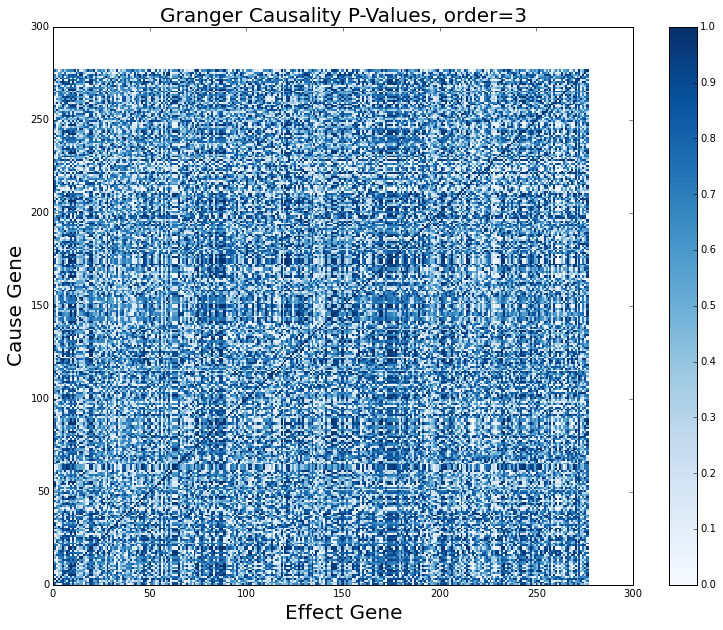

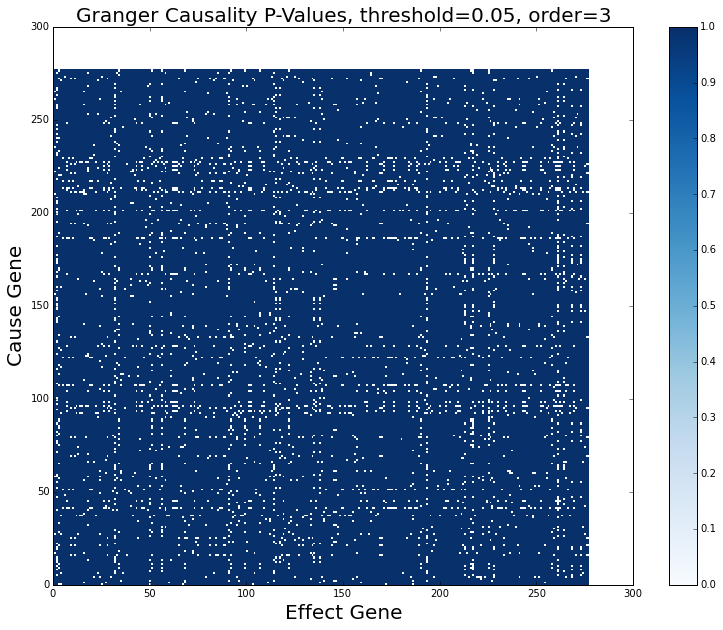

Total number of significant pairs  8113
Pairs significant across all matrices  1074 0.132380130655


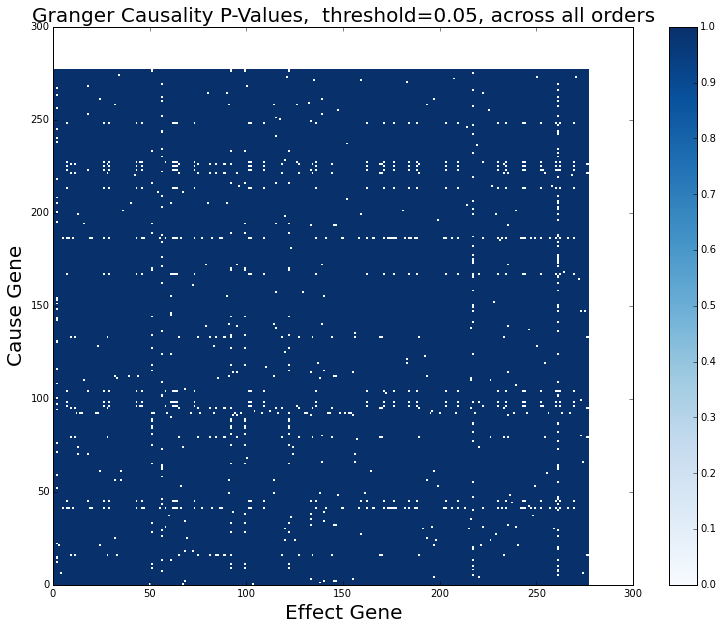

In [29]:
threshold = 0.05

sig_matr_list = []



for p in range(2,4):


    %time p_matr = ct.pairwise_granger_causality_all(geneTS, model_order=p, use_processes=True, procnum=16)

    sig_matr = p_matr < threshold
    
    sig_matr_list.append(sig_matr)
    
    print "P-values at p = ", p
    print p_matr
    plt.figure(figsize=(13,10))
    heatmap = plt.pcolor(p_matr , cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title("Granger Causality P-Values, order=" + str(p), fontsize=20)
    plt.xlabel("Effect Gene", fontsize=20)
    plt.ylabel("Cause Gene", fontsize=20)
    plt.show()

    
    plt.figure(figsize=(13,10))
    heatmap = plt.pcolor(1 - sig_matr, cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title("Granger Causality P-Values, threshold=" + str(threshold) + ", order=" + str(p), fontsize=20)
    plt.xlabel("Effect Gene", fontsize=20)
    plt.ylabel("Cause Gene", fontsize=20)
    plt.show()

all_sig_matr, all_sig_num, not_sig_num = gtm.compare_sig_matr(sig_matr_list=sig_matr_list)

print "Total number of significant pairs ", all_sig_num + not_sig_num
print "Pairs significant across all matrices ", all_sig_num, all_sig_num * 1.0 / (all_sig_num + not_sig_num)


plt.figure(figsize=(13,10))
heatmap = plt.pcolor(1 - all_sig_matr, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Granger Causality P-Values,  threshold=" + str(threshold) + ", across all orders", fontsize=20)
plt.xlabel("Effect Gene", fontsize=20)
plt.ylabel("Cause Gene", fontsize=20)
plt.show()

# print this out in an understandable format: write causes, effects, and p-values to a file?

# get sig p-values

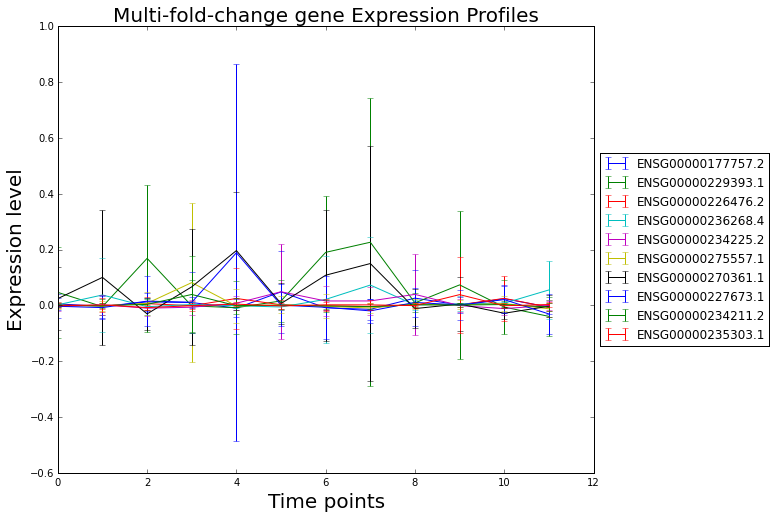

[('ENSG00000243799.1', 'ENSG00000249152.1'), ('ENSG00000238324.1', 'ENSG00000234707.2')]
ENSG00000243799.1 ENSG00000249152.1
ENSG00000238324.1 ENSG00000234707.2


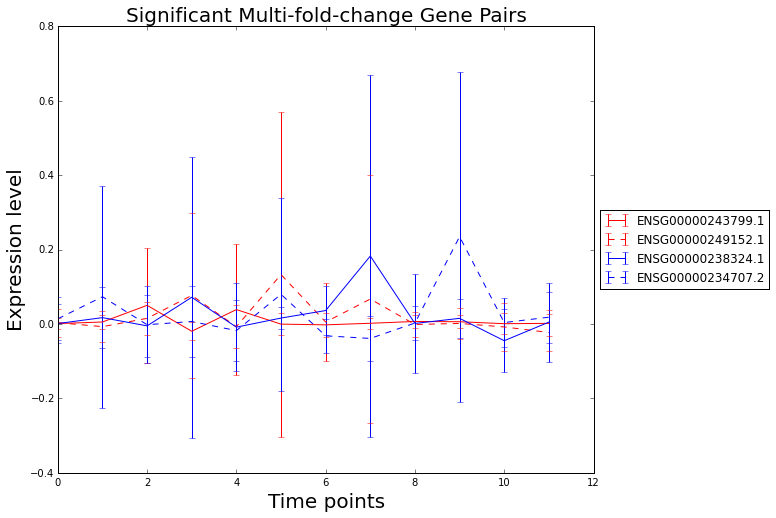

1074


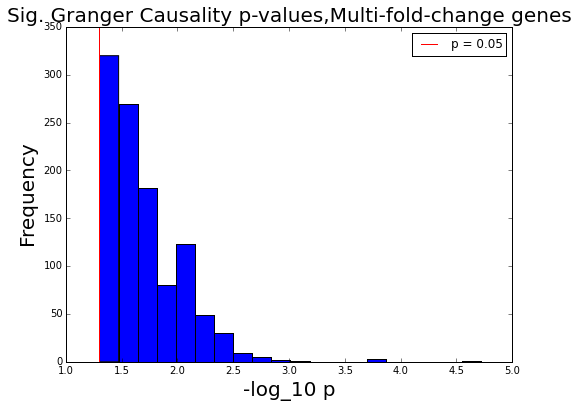

In [33]:
gene_name = "Multi-fold-change"
typical_genes = found_genes[0:10]

gtm.plot_genes(data, typical_genes, title= gene_name + " gene Expression Profiles")


# Plot some of the matched, significant pairs
plot_sig_matr = all_sig_matr & (p_matr < 0.0005)
gene_pairs = gtm.get_sig_gene_pairs(plot_sig_matr, found_genes)
plot_gene_pairs = gene_pairs[0:2]
print plot_gene_pairs
gtm.plot_gene_pairs(data, plot_gene_pairs, title="Significant " +gene_name + " Gene Pairs")

# Plot the p-matrix


sig_pvalues = p_matr[np.where(all_sig_matr)]
print len(sig_pvalues)


plt.figure(figsize=(8,6))
plt.hist(-1 * np.log10(sig_pvalues), bins=20)
plt.axvline(x=- 1 *np.log10(threshold), color='r', label='p = ' + str(threshold))
plt.xlabel("-log_10 p", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.legend()
plt.title("Sig. Granger Causality p-values," + gene_name + " genes", fontsize=20)
plt.show()

# Plot Basic Distributions
# Plot a few important gene TSs as well

In [ ]:
reload(gtm)

typical_genes = data['gene'][0:10]

gtm.plot_genes(data, typical_genes, title="Typical gene Expression Profiles")





change_indices = (data[fold_keys] > data[fold_keys].quantile(.999)).T.any() | (data[fold_keys] < data[fold_keys].quantile(.001)).T.any() 
change_genes = data['gene'][change_indices]

found_genes, geneTS = gtm.get_gene_TS(data, change_genes)
print len(found_genes)

plot_genes = found_genes[0:10]

gtm.plot_genes(data, plot_genes, title="Fold-Change " + name + " expression time series")


most_change_indices = (data[fold_keys] > data[fold_keys].quantile(.90)).T.sum() + (data[fold_keys] < data[fold_keys].quantile(.1)).T.sum()
most_change_threshold = 5
most_change_genes = data['gene'][most_change_indices > most_change_threshold]

plot_genes = most_change_genes[0:10]

gtm.plot_genes(data, plot_genes, title="Multi-Fold-Change " + name + " expression time series")



In [ ]:
rand_dict = {}
for i in range(len(keys)):
    rand_dict[keys[i]] = rand_geneTS[:, i]
    

    
rand_df = pd.DataFrame(rand_dict)

rand_df['gene'] = data['gene'][0:400]
plot_genes = rand_df['gene'][0:10]

gtm.plot_genes(rand_df, plot_genes, title="Random " + name + " expression time series")



# Get extreme change indices

In [1]:
# load the data

import pandas as pd
import numpy as np
import CausalTests as ct
reload(ct.pac)
reload(ct)
import multi_testing as mt
import geneTSmunging as gtm
reload(gtm)
import matplotlib.pyplot as plt
%matplotlib inline

filenames = ["../data/GeneExpressionData/featurecounts.genes.TPM.selected_reps.ln.surrogate_variables_corrected.ncrna.txt"]
names = ["NCRNA_TPM"]
original_keys = ["gene", "t00_rep1", "t00_rep2plusextra", "t00_rep3plusextra", "t00_rep4", "t05_rep1", "t05_rep2", "t05_rep3", "t05_rep4", "t1_rep1", "t1_rep2", "t1_rep3", "t1_rep4", "t2_rep1", "t2_rep2", "t2_rep3", "t2_rep4", "t3_rep1", "t3_rep2", "t3_rep3", "t3_rep4", "t4_rep1", "t4_rep2", "t4_rep3", "t4_rep4", "t5_rep2", "t5_rep3", "t5_rep4", "t6_rep2", "t6_rep3", "t6_rep4", "t7_rep1", "t7_rep2", "t7_rep3", "t7_rep4", "t8_rep1", "t8_rep2", "t8_rep3", "t8_rep4", "t10_rep1", "t10_rep2", "t10_rep3", "t10_rep4", "t12_rep1", "t12_rep2", "t12_rep3", "t12_rep4"]
keys = ["t00", "t05", "t1_", "t2_", "t3_", "t4_", "t5_", "t6_", "t7_", "t8_", "t10_", "t12_"]
fold_keys = []
for i in range(len(keys) - 1):
    key1 = keys[i]
    key2 = keys[i + 1]
    fold_key = key1 + "-" + key2 + " fold"
    fold_keys.append(fold_key)

diff_keys = []
for i in range(len(keys) - 1):
    key1 = keys[i]
    key2 = keys[i + 1]
    diff_key = key1 + "-" + key2 + " diff"
    diff_keys.append(diff_key)    
    
normal_diff_keys = []
for i, diff_key in zip(range(len(keys) - 1), diff_keys):
    key1 = keys[i]
    key2 = keys[i + 1]
    normal_diff_key = key1 + "-" + key2 + " normal_diff"
    normal_diff_keys.append(normal_diff_key)

datas = []
for filename in filenames:
    datas.append(gtm.load_file_and_avg(filename))
data = datas[0]
name = names[0]
print name

p_matr_dict = {}
sig_matr_dict = {}

model_orders = range(1,4)

['t00_rep1', 't00_rep2plusextra', 't00_rep3plusextra', 't00_rep4']
['t05_rep1', 't05_rep2', 't05_rep3', 't05_rep4']
['t1_rep1', 't1_rep2', 't1_rep3', 't1_rep4']
['t2_rep1', 't2_rep2', 't2_rep3', 't2_rep4']
['t3_rep1', 't3_rep2', 't3_rep3', 't3_rep4']
['t4_rep1', 't4_rep2', 't4_rep3', 't4_rep4']
['t5_rep2', 't5_rep3', 't5_rep4']
['t6_rep2', 't6_rep3', 't6_rep4']
['t7_rep1', 't7_rep2', 't7_rep3', 't7_rep4']
['t8_rep1', 't8_rep2', 't8_rep3', 't8_rep4']
['t10_rep1', 't10_rep2', 't10_rep3', 't10_rep4']
['t12_rep1', 't12_rep2', 't12_rep3', 't12_rep4']
t00 has 4 data points
t05 has 4 data points
t1_ has 4 data points
t2_ has 4 data points
t3_ has 4 data points
t4_ has 4 data points
t5_ has 3 data points
t6_ has 3 data points
t7_ has 4 data points
t8_ has 4 data points
t10_ has 4 data points
t12_ has 4 data points
NCRNA_TPM


[[-0.04896471  0.08722267  0.07154172 ...,  0.01168533  0.0355659  -0.06441   ]
 [-0.1455548   0.17903237 -1.68428397 ..., -0.25435327 -0.74311885
   2.43063586]
 [ 0.03402748  0.12786811  0.24483769 ..., -0.0354796   0.02202455
  -0.26324364]
 ..., 
 [ 2.01604517 -2.36876829  0.01378489 ...,  0.13562981 -0.08378649
   0.07771653]
 [ 1.05947696  0.15605151 -2.49288647 ..., -0.73661228  1.07916529
   0.20481025]
 [-0.28367687 -0.24652444  0.90108972 ..., -0.72086615  0.20440564
   2.26369189]]
[ 2.25867215  2.43063586  2.27351977 ...,  2.01604517  1.07916529
  2.26369189]
[-2.2030843  -1.68428397 -2.14901032 ..., -2.36876829 -2.49288647
 -1.49896342]
10th percentile of max normal is  2.50159347475


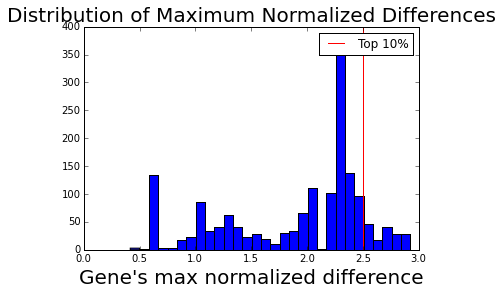

10th percentile of min normal is  -2.82151956168


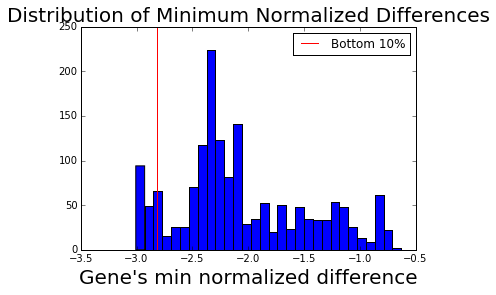

(324, 108)
Changed data written to  ../data/GeneExpressionData/featurecounts.genes.TPM.selected_reps.ln.surrogate_variables_corrected.ncrna_extreme-change_extreme-change.txt


KeyError: 0

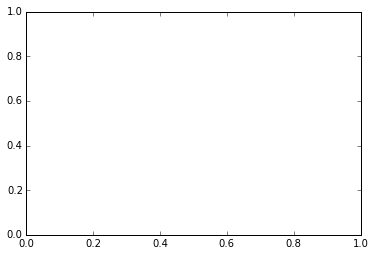

In [29]:
normal_diffs = data[normal_diff_keys].values
print normal_diffs
max_normal_diffs = np.max(normal_diffs, axis=1)
print max_normal_diffs
min_normal_diffs = np.min(normal_diffs, axis=1)
print min_normal_diffs

import scipy.stats as stats
max10 = stats.scoreatpercentile(max_normal_diffs, 90)
print "10th percentile of max normal is ", max10
plt.figure()
plt.title("Distribution of Maximum Normalized Differences", fontsize=20)
plt.hist(max_normal_diffs, bins=30)
plt.axvline(x=max10, label="Top 10%", color="red")
plt.xlabel("Gene's max normalized difference", fontsize=20)
plt.legend()
plt.show()

import scipy.stats as stats
min10 = stats.scoreatpercentile(min_normal_diffs, 10)
print "10th percentile of min normal is ", min10
plt.figure()
plt.title("Distribution of Minimum Normalized Differences", fontsize=20)
plt.hist(min_normal_diffs, bins=30)
plt.axvline(x=min10, label="Bottom 10%", color="red")
plt.xlabel("Gene's min normalized difference", fontsize=20)
plt.legend()
plt.show()

# Let's take the genes with normalized difference in extreme
# > 2 or < -2


data["Max normal_diff"] = max_normal_diffs
data["Min normal_diff"] = min_normal_diffs
change_data = data[(data["Max normal_diff"] > max10 )| (data['Min normal_diff'] < min10)]
print change_data.shape

newfilename = filenames[0][:-4] + "_extreme-change.txt"
change_data.to_csv(newfilename, columns=original_keys, index=False, sep='\t')
print "Changed data written to ", newfilename

plt.hist(change_data["Max normal_diff"], alpha=0.5)
plt.hist(change_data["Min normal_diff"], alpha=0.5)

## Randomize the exteme change genes

In [23]:
# load the data

import pandas as pd
import numpy as np
import CausalTests as ct
reload(ct.pac)
reload(ct)
import multi_testing as mt
import geneTSmunging as gtm
reload(gtm)
import matplotlib.pyplot as plt
%matplotlib inline

filenames = ["../data/GeneExpressionData/featurecounts.genes.TPM.selected_reps.ln.surrogate_variables_corrected.ncrna_extreme-change.txt"]
names = ["NCRNA_TPM"]
original_keys = ["gene", "t00_rep1", "t00_rep2plusextra", "t00_rep3plusextra", "t00_rep4", "t05_rep1", "t05_rep2", "t05_rep3", "t05_rep4", "t1_rep1", "t1_rep2", "t1_rep3", "t1_rep4", "t2_rep1", "t2_rep2", "t2_rep3", "t2_rep4", "t3_rep1", "t3_rep2", "t3_rep3", "t3_rep4", "t4_rep1", "t4_rep2", "t4_rep3", "t4_rep4", "t5_rep2", "t5_rep3", "t5_rep4", "t6_rep2", "t6_rep3", "t6_rep4", "t7_rep1", "t7_rep2", "t7_rep3", "t7_rep4", "t8_rep1", "t8_rep2", "t8_rep3", "t8_rep4", "t10_rep1", "t10_rep2", "t10_rep3", "t10_rep4", "t12_rep1", "t12_rep2", "t12_rep3", "t12_rep4"]
keys = ["t00", "t05", "t1_", "t2_", "t3_", "t4_", "t5_", "t6_", "t7_", "t8_", "t10_", "t12_"]
fold_keys = []
for i in range(len(keys) - 1):
    key1 = keys[i]
    key2 = keys[i + 1]
    fold_key = key1 + "-" + key2 + " fold"
    fold_keys.append(fold_key)

diff_keys = []
for i in range(len(keys) - 1):
    key1 = keys[i]
    key2 = keys[i + 1]
    diff_key = key1 + "-" + key2 + " diff"
    diff_keys.append(diff_key)    
    
normal_diff_keys = []
for i, diff_key in zip(range(len(keys) - 1), diff_keys):
    key1 = keys[i]
    key2 = keys[i + 1]
    normal_diff_key = key1 + "-" + key2 + " normal_diff"
    normal_diff_keys.append(normal_diff_key)

datas = []
for filename in filenames:
    datas.append(gtm.load_file_and_avg(filename))
data = datas[0]
name = names[0]
print name

p_matr_dict = {}
sig_matr_dict = {}

model_orders = range(1,4)

['t00_rep1', 't00_rep2plusextra', 't00_rep3plusextra', 't00_rep4']
['t05_rep1', 't05_rep2', 't05_rep3', 't05_rep4']
['t1_rep1', 't1_rep2', 't1_rep3', 't1_rep4']
['t2_rep1', 't2_rep2', 't2_rep3', 't2_rep4']
['t3_rep1', 't3_rep2', 't3_rep3', 't3_rep4']
['t4_rep1', 't4_rep2', 't4_rep3', 't4_rep4']
['t5_rep2', 't5_rep3', 't5_rep4']
['t6_rep2', 't6_rep3', 't6_rep4']
['t7_rep1', 't7_rep2', 't7_rep3', 't7_rep4']
['t8_rep1', 't8_rep2', 't8_rep3', 't8_rep4']
['t10_rep1', 't10_rep2', 't10_rep3', 't10_rep4']
['t12_rep1', 't12_rep2', 't12_rep3', 't12_rep4']
t00 has 4 data points
t05 has 4 data points
t1_ has 4 data points
t2_ has 4 data points
t3_ has 4 data points
t4_ has 4 data points
t5_ has 3 data points
t6_ has 3 data points
t7_ has 4 data points
t8_ has 4 data points
t10_ has 4 data points
t12_ has 4 data points
NCRNA_TPM


In [24]:
gtm.make_and_save_randomized_data(data, filename=filenames[0][:-4] + "_randomized.txt")

Randomized written to  ../data/GeneExpressionData/featurecounts.genes.TPM.selected_reps.ln.surrogate_variables_corrected.ncrna_extreme-change_randomized.txt


,gene,t00,t05,t1_,t2_,t3_,t4_,t5_,t6_,t7_,t8_,t10_,t12_
0,ENSG00000243485.3,-0.001110,-0.000710,0.047217,-0.000913,0.000595,-0.000593,-0.000168,0.001036,0.002446,-0.000043,0.000466,0.000287
1,ENSG00000231709.1,0.003909,0.006456,-0.010811,0.004942,0.005262,0.012067,0.002807,-0.008231,0.049676,0.007888,0.003855,-0.020846
2,ENSG00000239664.2,0.007580,0.080736,0.006672,-0.004266,-0.004189,-0.000782,-0.004565,0.004431,0.006945,-0.013979,-0.004081,-0.002021
3,ENSG00000235373.1,0.022077,0.039251,0.028212,0.050220,0.056435,0.016362,0.069902,0.000241,0.030850,0.122883,0.060205,0.022330
4,ENSG00000223764.2,1.579399,1.707083,1.706406,1.490975,1.955459,1.419673,1.583192,1.806431,1.714967,1.735946,1.958137,1.699891
5,ENSG00000273443.1,0.061444,0.021559,0.016016,0.078069,-0.012830,0.087313,-0.014306,-0.006932,0.057265,-0.012243,0.188981,0.054183
6,ENSG00000230415.1,0.733871,0.732387,0.847066,0.897892,0.808030,0.758796,0.859033,0.751890,1.027380,0.715927,0.810975,0.791008
7,ENSG00000224387.1,0.003282,0.077246,-0.012569,-0.005420,-0.006138,0.004438,-0.006388,0.001444,-0.008021,-0.011338,0.014231,0.020894
8,ENSG00000228037.1,-0.041243,0.058337,-0.018341,0.074703,0.083293,0.012426,-0.010193,0.005823,0.085002,0.004733,0.019367,0.004806
9,ENSG00000276189.1,0.035285,0.481672,-0.023249,-0.023525,-0.079983,0.059916,0.042269,-0.022866,-0.021045,-0.060720,0.035313,-0.001479


In [26]:
data[["gene"] + keys]

,gene,t00,t05,t1_,t2_,t3_,t4_,t5_,t6_,t7_,t8_,t10_,t12_
0,ENSG00000243485.3,0.000466,-0.000710,0.001036,0.002446,-0.000593,0.000287,-0.001110,0.047217,-0.000168,-0.000043,0.000595,-0.000913
1,ENSG00000231709.1,0.002807,0.003855,0.012067,-0.020846,-0.010811,0.006456,0.004942,0.007888,0.005262,0.003909,-0.008231,0.049676
2,ENSG00000239664.2,-0.004565,-0.004266,-0.000782,0.006672,0.007580,0.004431,0.080736,0.006945,-0.002021,-0.004081,-0.004189,-0.013979
3,ENSG00000235373.1,0.030850,0.069902,0.050220,0.016362,0.022077,0.022330,0.122883,0.056435,0.060205,0.039251,0.028212,0.000241
4,ENSG00000223764.2,1.955459,1.958137,1.806431,1.699891,1.583192,1.579399,1.419673,1.490975,1.735946,1.714967,1.706406,1.707083
5,ENSG00000273443.1,0.087313,0.078069,0.057265,0.188981,0.061444,0.054183,0.021559,0.016016,-0.012830,-0.012243,-0.014306,-0.006932
6,ENSG00000230415.1,0.810975,0.791008,0.758796,0.715927,0.732387,0.859033,0.897892,1.027380,0.751890,0.808030,0.847066,0.733871
7,ENSG00000224387.1,-0.005420,-0.006138,-0.011338,0.020894,0.014231,-0.006388,0.001444,0.003282,-0.008021,-0.012569,0.077246,0.004438
8,ENSG00000228037.1,0.012426,0.004806,0.005823,0.004733,-0.018341,-0.010193,-0.041243,0.083293,0.058337,0.074703,0.019367,0.085002
9,ENSG00000276189.1,-0.021045,-0.023249,-0.001479,0.035313,0.035285,0.042269,0.481672,0.059916,-0.022866,-0.023525,-0.060720,-0.079983


# Validation for NCRNA

In [9]:
# load the data

import pandas as pd
import numpy as np
import CausalTests as ct
reload(ct.pac)
reload(ct)
import multi_testing as mt
import geneTSmunging as gtm
reload(gtm)
import matplotlib.pyplot as plt
%matplotlib inline

filenames = ["../data/GeneExpressionData/featurecounts.genes.TPM.selected_reps.ln.surrogate_variables_corrected.ncrna_extreme-change.txt"]
names = ["NCRNA_TPM-extreme-change"]
keys = ["t00", "t05", "t1_", "t2_", "t3_", "t4_", "t5_", "t6_", "t7_", "t8_", "t10_", "t12_"]
fold_keys = []
for i in range(len(keys) - 1):
    key1 = keys[i]
    key2 = keys[i + 1]
    fold_key = key1 + "-" + key2 + " fold"
    fold_keys.append(fold_key)

diff_keys = []
for i in range(len(keys) - 1):
    key1 = keys[i]
    key2 = keys[i + 1]
    diff_key = key1 + "-" + key2 + " diff"
    diff_keys.append(diff_key)    
    
normal_diff_keys = []
for i, diff_key in zip(range(len(keys) - 1), diff_keys):
    key1 = keys[i]
    key2 = keys[i + 1]
    normal_diff_key = key1 + "-" + key2 + " normal_diff"
    normal_diff_keys.append(normal_diff_key)

datas = []
for filename in filenames:
    datas.append(gtm.load_file_and_avg(filename))
data = datas[0]
name = names[0]
print name
print data.shape

p_matr_dict = {}
sig_matr_dict = {}
beta_matr_dict = {}
sig_max_beta_dict = {}

model_orders = range(1,4)

['t00_rep1', 't00_rep2plusextra', 't00_rep3plusextra', 't00_rep4']
['t05_rep1', 't05_rep2', 't05_rep3', 't05_rep4']
['t1_rep1', 't1_rep2', 't1_rep3', 't1_rep4']
['t2_rep1', 't2_rep2', 't2_rep3', 't2_rep4']
['t3_rep1', 't3_rep2', 't3_rep3', 't3_rep4']
['t4_rep1', 't4_rep2', 't4_rep3', 't4_rep4']
['t5_rep2', 't5_rep3', 't5_rep4']
['t6_rep2', 't6_rep3', 't6_rep4']
['t7_rep1', 't7_rep2', 't7_rep3', 't7_rep4']
['t8_rep1', 't8_rep2', 't8_rep3', 't8_rep4']
['t10_rep1', 't10_rep2', 't10_rep3', 't10_rep4']
['t12_rep1', 't12_rep2', 't12_rep3', 't12_rep4']
t00 has 4 data points
t05 has 4 data points
t1_ has 4 data points
t2_ has 4 data points
t3_ has 4 data points
t4_ has 4 data points
t5_ has 3 data points
t6_ has 3 data points
t7_ has 4 data points
t8_ has 4 data points
t10_ has 4 data points
t12_ has 4 data points
NCRNA_TPM-extreme-change
(1621, 106)


In [6]:
genes = data['gene'][100:200].values
gene_name = "Typical"

found_genes, geneTS = gtm.get_gene_TS(data, genes)
threshold = 0.05

sig_matr_list = []
p_matr_list = []
beta_matr_list = []


print "Gene number ", len(found_genes)
for p in model_orders:
    

    %time p_matr, beta_matr = ct.pairwise_granger_causality_all(geneTS, None, model_order=p, use_processes=True, procnum=20)

    p_matr_list.append(p_matr)
    
    beta_matr_list.append(beta_matr)
    
    sig_matr = p_matr < threshold
    
    sig_matr_list.append(sig_matr)
    
    print "For model order ", p, "# significant:", len(np.where(sig_matr)[0])


p_matr_dict[gene_name] = p_matr_list[:]
sig_matr_dict[gene_name] = sig_matr_list[:]
beta_matr_dict[gene_name] = beta_matr_list[:]

all_sig_matr, all_sig_num, not_sig_num = gtm.compare_sig_matr(sig_matr_list=sig_matr_list)

print "Total number of significant pairs ", all_sig_num + not_sig_num
print "Pairs significant across all matrices ", all_sig_num, all_sig_num * 1.0 / (all_sig_num + not_sig_num)

Gene number  100
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(99, 89), (99, 90), (99, 91), (99, 92), (99, 93), (99, 94), (99, 95), (99, 96), (99, 97), (99, 98)]
time to partition inputs  0.0001060962677
Time to prepare function args  5.60283660889e-05


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Pool initialized at  08:37:14
number of processes:  20
Mapping begun at  08:37:14


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Mapping finished at  08:37:18
Time to get return values  4.73743987083
Time to integrate return values  0.00119304656982
CPU times: user 59 ms, sys: 83.2 ms, total: 142 ms
Wall time: 4.83 s
For model order  1 # significant: 894
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(99, 89), (99, 90), (99, 91), (99, 92), (99, 93), (99, 94), (99, 95), (99, 96), (99, 97), (99, 98)]
time to partition inputs  7.29560852051e-05
Time to prepare function args  4.60147857666e-05


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Pool initialized at  08:37:19
number of processes:  20
Mapping begun at  08:37:19


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Mapping finished at  08:37:23
Time to get return values  4.74793696404
Time to integrate return values  0.00205016136169
CPU times: user 60.2 ms, sys: 95 ms, total: 155 ms
Wall time: 4.85 s
For model order  2 # significant: 1055
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10)] [(99, 89), (99, 90), (99, 91), (99, 92), (99, 93), (99, 94), (99, 95), (99, 96), (99, 97), (99, 98)]
time to partition inputs  0.000127792358398
Time to prepare function args  7.91549682617e-05


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Pool initialized at  08:37:23
number of processes:  20
Mapping begun at  08:37:23


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (

Mapping finished at  08:37:28
Time to get return values  4.87816691399
Time to integrate return values  0.00283408164978
CPU times: user 62.4 ms, sys: 86.1 ms, total: 148 ms
Wall time: 4.97 s
For model order  3 # significant: 749
Total number of significant pairs  1795
Pairs significant across all matrices  253 0.140947075209


In [8]:
print p_matr_dict[gene_name][2]

import pickle
output = pickle.load(open("della/ncrna-extremechange_granger-3/ncrna-extremechange_granger-3.p", 'rU'))
print output[0][100:, 100:]

[[ 0.          0.81546835  0.62131678 ...,  0.59497382  0.25937723
   0.82185818]
 [ 0.04332326  0.          0.76107083 ...,  0.24801167  0.93240266
   0.01692485]
 [ 0.94718133  0.07955281  0.         ...,  0.6689909   0.29149598
   0.9829262 ]
 ..., 
 [ 0.11494833  0.75732525  0.49832905 ...,  0.          0.7662101
   0.16950136]
 [ 0.47778836  0.66310469  0.77425348 ...,  0.47343153  0.          0.99465771]
 [ 0.8276619   0.2173939   0.79370417 ...,  0.43077066  0.61849912  0.        ]]
[[ 0.          0.81546835  0.62131678 ...,  0.39795516  0.81064614
   0.40934058]
 [ 0.04332326  0.          0.76107083 ...,  0.35015294  0.08461288
   0.82346343]
 [ 0.94718133  0.07955281  0.         ...,  0.55295583  0.07626084
   0.35554082]
 ..., 
 [ 0.16857766  0.71336546  0.72698423 ...,  0.          0.46917934
   0.55222117]
 [ 0.31190002  0.13622515  0.95659706 ...,  0.22760388  0.          0.58352254]
 [ 0.3749155   0.67222006  0.63599218 ...,  0.33037941  0.6827198   0.        ]]


# Plot the extreme change genes

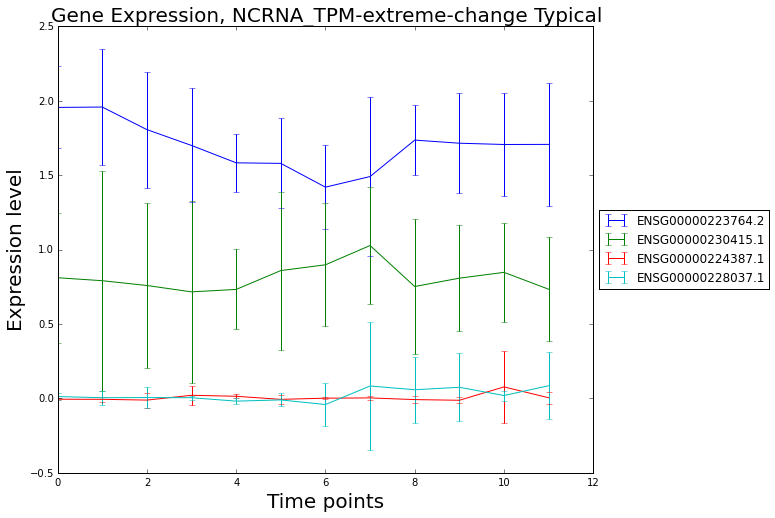

In [21]:
genes = np.concatenate((data["gene"][4:5],data["gene"][6:9], ))
gtm.plot_genes(data, genes, title="Gene Expression, "+ name + " " + gene_name)

# Compare the randomized to the normal

In [9]:
# Take a look at the betas and p-values
import pickle
import geneTSmunging as gtm

data = gtm.load_file_and_avg("../data/GeneExpressionData/featurecounts.genes.TPM.selected_reps.ln.surrogate_variables_corrected.ncrna_extreme-change.txt")
rand_data = gtm.load_file_and_avg("../data/GeneExpressionData/featurecounts.genes.TPM.selected_reps.ln.surrogate_variables_corrected.ncrna_extreme-change_randomized.txt")


prefixes = ["ncrna-extremechange_granger-" + str(i) for i in range(1,4)]
filenames = ["della/"+prefix + "/" + prefix + ".p" for prefix in prefixes]
rand_filenames = ["della/"+prefix + "-randomized/" + prefix + "-randomized.p" for prefix in prefixes]

outputs = []
rand_outputs = []
for filename in filenames:
    with open(filename, 'rU') as outfile:
        outputs.append(pickle.load(outfile))
ps = [output[0] for output in outputs]
betas = [output[1] for output in outputs]
avg_betas = [np.average(beta, axis=2) for beta in betas]
max_betas = [np.max(beta, axis=2) for beta in betas]



for rand_filename in rand_filenames:
    with open(rand_filename, 'rU') as outfile:
        rand_outputs.append(pickle.load(outfile))
    

rand_ps = [output[0] for output in rand_outputs]
rand_betas = [output[1] for output in rand_outputs]

avg_rand_betas = [np.average(rand_beta, axis=2) for rand_beta in rand_betas]
max_rand_betas = [np.max(rand_beta, axis=2) for rand_beta in rand_betas]

sigs = [p < 0.05 for p in ps]
rand_sigs = [p < 0.05 for p in rand_ps]

import numpy as np
some_sig_matr = np.zeros(sigs[0].shape)
some_randsig_matr = np.zeros(rand_sigs[0].shape)
for sig, rand_sig, i in zip(sigs, rand_sigs, range(1, len(sigs) + 1)):
    print sig.shape, some_sig_matr.shape
    some_sig_matr = np.logical_or(sig, some_sig_matr)
    some_randsig_matr = np.logical_or(rand_sig, some_randsig_matr)
    print "model order", i
    print "Number pairs ", sig.ravel().shape
    print "Number sig ", len(np.where(sig)[0])
    print "Number pairs ", rand_sig.ravel().shape
    print "Number sig ", len(np.where(rand_sig)[0])
    print "----------------------"

all_sig_matr, all_sig_num, not_sig_num =gtm.compare_sig_matr(sigs)


print "Number of pairs sig for at least one ", len(np.where(some_sig_matr)[0])
print "Number of pairs significant over all ", all_sig_num
print "All Sig Ratio: ", all_sig_num * 1.0 / (all_sig_matr.shape[0] * all_sig_matr.shape[1])

print "For random"

all_rand_sig_matr, all_rand_sig_num, not_rand_sig_num =gtm.compare_sig_matr(rand_sigs)

print "Number of pairs rand_sig for at least one ", len(np.where(some_randsig_matr)[0])
print "Number of pairs rand_significant over all ", all_rand_sig_num
print "All Sig Ratio: ", all_rand_sig_num * 1.0 / (all_rand_sig_matr.shape[0] * all_rand_sig_matr.shape[1])

not_rand_sig_matr = ~ some_randsig_matr

(1621, 1621) (1621, 1621)
model order 1
Number pairs  (2627641,)
Number sig  221876
Number pairs  (2627641,)
Number sig  186938
----------------------
(1621, 1621) (1621, 1621)
model order 2
Number pairs  (2627641,)
Number sig  271986
Number pairs  (2627641,)
Number sig  254206
----------------------
(1621, 1621) (1621, 1621)
model order 3
Number pairs  (2627641,)
Number sig  195694
Number pairs  (2627641,)
Number sig  200925
----------------------
Number of pairs sig for at least one  495345
Number of pairs significant over all  35360
All Sig Ratio:  0.01345693723
For random
Number of pairs rand_sig for at least one  446411
Number of pairs rand_significant over all  38990
All Sig Ratio:  0.0148384044852


In [178]:
import pandas as pd
import collections
def save_gene_matrix(filename, matrix, genes):
    data_dict = collections.OrderedDict()
    for i, gene in zip(range(len(genes)), genes):
        data_dict[gene] = matrix[:, i]
    df = pd.DataFrame(data_dict)
    df["gene"] = genes
    
    df = df.set_index("gene")
    
    
    df.to_csv(filename,sep="\t")
    
    

# Write original and threshold matrices, lag 1, t-1

In [212]:
import matplotlib.pyplot as plt

fdr = 0.1
index = 0
num = 0

prefix = "../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-" + str(index + 1) + "_beta-t-" + str(num + 1) + "_"
fdr_file = prefix + "thresh-FDR-" + str(fdr) + ".txt"
matrix_file = prefix + "no-thresh.txt"
rand_matrix_file = prefix + "null.txt"
left_precision_file = prefix + "Left-Precision"
right_precision_file = prefix + "Right-Precision"
readme_file = prefix + "_README.txt"

beta_matr = betas[index][:, :, num]
rand_beta_matr = rand_betas[index][:, :, num]
sig_matr = sigs[index]

genes = data["gene"]
rand_genes = rand_data["gene"]

just_sig_betas = beta_matr[np.where(sigs[index])]

not_rand_just_sig_betas = rand_beta_matr[np.where(np.logical_not(rand_sigs[index]))]


print "Beta Matrix of lag ", index + 1, "and num", num + 1, "saved to ", matrix_file
save_gene_matrix(matrix=beta_matr, filename=matrix_file, genes=genes)

print "Rand Matrix of lag", index + 1, "and num", num + 1, " saved to ", rand_matrix_file
save_gene_matrix(matrix=rand_beta_matr, filename=rand_matrix_file, genes=rand_genes)

print "Using original"
print "Trying to have an FDR of ", fdr
print "Taking the ", num + 1, "-th previous timepoint"

from statsmodels.distributions.empirical_distribution import ECDF

sig_cdf = ECDF(just_sig_betas)
not_sig_cdf = ECDF(not_rand_just_sig_betas)


all_betas = np.concatenate((just_sig_betas, not_rand_just_sig_betas))
beta_space = np.sort(all_betas)

left_precisions = [sig_cdf(beta)/(sig_cdf(beta) + not_sig_cdf(beta)) for beta in beta_space]
right_precisions = [(1 - sig_cdf(beta)) / (2.0 - sig_cdf(beta) - not_sig_cdf(beta)) for beta in beta_space]

import os
os.system("say 'finished'")

Beta Matrix of lag  1 and num 1 saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-1_beta-t-1_no-thresh.txt
Rand Matrix of lag 1 and num 1  saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-1_beta-t-1_null.txt
Using original
Trying to have an FDR of  0.1
Taking the  1 -th previous timepoint


0

Plot saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-1_beta-t-1_Right-Precision


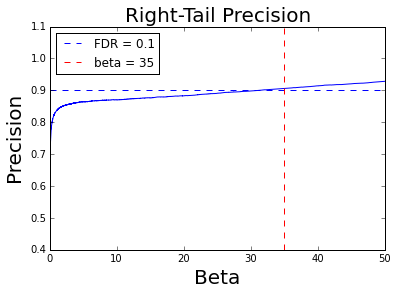

In [213]:
import matplotlib.pyplot as plt


right_xmin = 0
right_xmax = 50
right_threshold = 35

fig = plt.figure()
plt.plot(beta_space, right_precisions)
plt.xlim(right_xmin,right_xmax)
plt.axhline(y=1 - fdr, linestyle='dashed', label="FDR = " + str(fdr))
plt.axvline(x=right_threshold, color = 'red', linestyle='dashed', label="beta = " + str(right_threshold))
plt.title("Right-Tail Precision", fontsize=20)
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Precision", fontsize=20)
plt.legend(loc='best')
fig.savefig(right_precision_file)
print "Plot saved to ", right_precision_file
plt.show()

Plot saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-1_beta-t-1_Left-Precision


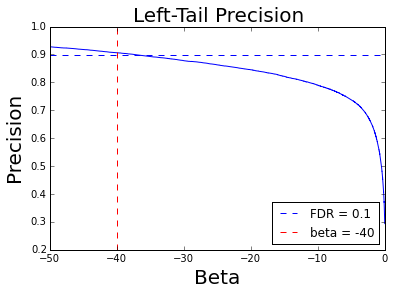

0

In [218]:
left_xmin = -50
left_xmax = 0
left_threshold = -40


fig = plt.figure()
plt.plot(beta_space, left_precisions)
plt.title("Left-Tail Precision", fontsize=20)
plt.xlim(left_xmin, left_xmax)
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Precision", fontsize=20)
plt.axhline(y=1 - fdr, linestyle='dashed', label="FDR = " + str(fdr))
plt.axvline(x=left_threshold, color = 'red', linestyle='dashed', label="beta = " + str(left_threshold))
plt.legend(loc='best')
fig.savefig(left_precision_file)
print "Plot saved to ", left_precision_file
plt.show()


import os
os.system("say 'finished'")

In [219]:
print len(np.where(just_sig_betas > right_threshold)[0])
print len(np.where(just_sig_betas < left_threshold)[0])

2383
1893


In [220]:
# Let's create these matrices
import numpy as np


under_indices = np.where(np.logical_or(np.logical_not(sig_matr), np.logical_and(beta_matr <= right_threshold, beta_matr >= left_threshold)))
print "Num significant ", beta_matr.shape[0] * beta_matr.shape[1] - len(under_indices[0])

thresh_matr = beta_matr[:,:]
thresh_matr[under_indices] = 0
print "Second check: num sig", len(np.where(thresh_matr)[0])

Num significant  4276
Second check: num sig 4276


In [221]:
print "Thresholded matrix file saved to ", fdr_file

save_gene_matrix(filename=fdr_file, matrix=thresh_matr, genes=genes)

with open(readme_file, 'w') as f:

    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nRight Threshold: "+ str(right_threshold))
    f.write("\nLeft Threshold: " + str(left_threshold))

print "Readme file written to ", readme_file

Thresholded matrix file saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-1_beta-t-1_thresh-FDR-0.1.txt
Readme file written to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-1_beta-t-1__README.txt


# Write original and threshold matrices, lag 2, t-1

In [206]:
import matplotlib.pyplot as plt

fdr = 0.1
index = 1
num = 0

prefix = "../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-" + str(index + 1) + "_beta-t-" + str(num + 1) + "_"
fdr_file = prefix + "thresh-FDR-" + str(fdr) + ".txt"
matrix_file = prefix + "no-thresh.txt"
rand_matrix_file = prefix + "null.txt"
left_precision_file = prefix + "Left-Precision"
right_precision_file = prefix + "Right-Precision"
readme_file = prefix + "_README.txt"

beta_matr = betas[index][:, :, num]
rand_beta_matr = rand_betas[index][:, :, num]
sig_matr = sigs[index]

genes = data["gene"]
rand_genes = rand_data["gene"]

just_sig_betas = beta_matr[np.where(sigs[index])]

not_rand_just_sig_betas = rand_beta_matr[np.where(np.logical_not(rand_sigs[index]))]


print "Beta Matrix of lag ", index + 1, "and num", num + 1, "saved to ", matrix_file
save_gene_matrix(matrix=beta_matr, filename=matrix_file, genes=genes)

print "Rand Matrix of lag", index + 1, "and num", num + 1, " saved to ", rand_matrix_file
save_gene_matrix(matrix=rand_beta_matr, filename=rand_matrix_file, genes=rand_genes)

print "Using original"
print "Trying to have an FDR of ", fdr
print "Taking the ", num + 1, "-th previous timepoint"

from statsmodels.distributions.empirical_distribution import ECDF

sig_cdf = ECDF(just_sig_betas)
not_sig_cdf = ECDF(not_rand_just_sig_betas)


all_betas = np.concatenate((just_sig_betas, not_rand_just_sig_betas))
beta_space = np.sort(all_betas)

left_precisions = [sig_cdf(beta)/(sig_cdf(beta) + not_sig_cdf(beta)) for beta in beta_space]
right_precisions = [(1 - sig_cdf(beta)) / (2.0 - sig_cdf(beta) - not_sig_cdf(beta)) for beta in beta_space]

import os
os.system("say 'finished'")

Beta Matrix of lag  2 and num 1 saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-2_beta-t-1_no-thresh.txt
Rand Matrix of lag 2 and num 1  saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-2_beta-t-1_null.txt
Using original
Trying to have an FDR of  0.1
Taking the  1 -th previous timepoint


0

Plot saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-2_beta-t-1_Right-Precision


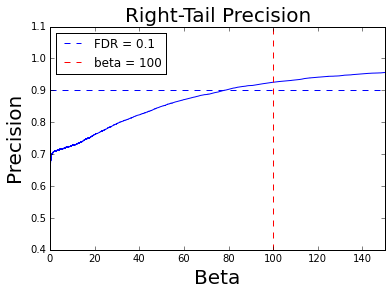

In [207]:
import matplotlib.pyplot as plt


right_xmin = 0
right_xmax = 150
right_threshold = 100

fig = plt.figure()
plt.plot(beta_space, right_precisions)
plt.xlim(right_xmin,right_xmax)
plt.axhline(y=1 - fdr, linestyle='dashed', label="FDR = " + str(fdr))
plt.axvline(x=right_threshold, color = 'red', linestyle='dashed', label="beta = " + str(right_threshold))
plt.title("Right-Tail Precision", fontsize=20)
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Precision", fontsize=20)
plt.legend(loc='best')
fig.savefig(right_precision_file)
print "Plot saved to ", right_precision_file
plt.show()

Plot saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-2_beta-t-1_Left-Precision


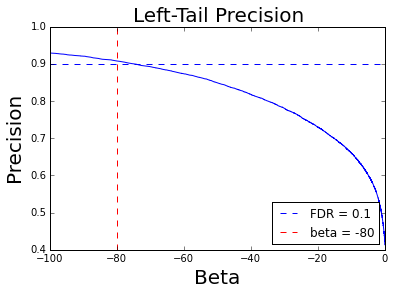

0

In [208]:
left_xmin = -100
left_xmax = 0
left_threshold = -80


fig = plt.figure()
plt.plot(beta_space, left_precisions)
plt.title("Left-Tail Precision", fontsize=20)
plt.xlim(left_xmin, left_xmax)
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Precision", fontsize=20)
plt.axhline(y=1 - fdr, linestyle='dashed', label="FDR = " + str(fdr))
plt.axvline(x=left_threshold, color = 'red', linestyle='dashed', label="beta = " + str(left_threshold))
plt.legend(loc='best')
fig.savefig(left_precision_file)
print "Plot saved to ", left_precision_file
plt.show()


import os
os.system("say 'finished'")

In [209]:
print len(np.where(just_sig_betas > right_threshold)[0])
print len(np.where(just_sig_betas < left_threshold)[0])

1519
1731


In [210]:
# Let's create these matrices
import numpy as np


under_indices = np.where(np.logical_or(np.logical_not(sig_matr), np.logical_and(beta_matr <= right_threshold, beta_matr >= left_threshold)))
print "Num significant ", beta_matr.shape[0] * beta_matr.shape[1] - len(under_indices[0])

thresh_matr = beta_matr[:,:]
thresh_matr[under_indices] = 0
print "Second check: num sig", len(np.where(thresh_matr)[0])

Num significant  3250
Second check: num sig 3250


In [211]:
print "Thresholded matrix file saved to ", fdr_file

save_gene_matrix(filename=fdr_file, matrix=thresh_matr, genes=genes)

with open(readme_file, 'w') as f:

    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nRight Threshold: "+ str(right_threshold))
    f.write("\nLeft Threshold: " + str(left_threshold))

print "Readme file written to ", readme_file

Thresholded matrix file saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-2_beta-t-1_thresh-FDR-0.1.txt
Readme file written to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-2_beta-t-1__README.txt


# Write original and threshold matrices, lag 2, t-2

In [196]:
import matplotlib.pyplot as plt

fdr = 0.1
index = 1
num = 1

prefix = "../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-" + str(index + 1) + "_beta-t-" + str(num + 1) + "_"
fdr_file = prefix + "thresh-FDR-" + str(fdr) + ".txt"
matrix_file = prefix + "no-thresh.txt"
rand_matrix_file = prefix + "null.txt"
left_precision_file = prefix + "Left-Precision"
right_precision_file = prefix + "Right-Precision"
readme_file = prefix + "_README.txt"

beta_matr = betas[index][:, :, num]
rand_beta_matr = rand_betas[index][:, :, num]
sig_matr = sigs[index]

genes = data["gene"]
rand_genes = rand_data["gene"]

just_sig_betas = beta_matr[np.where(sigs[index])]

not_rand_just_sig_betas = rand_beta_matr[np.where(np.logical_not(rand_sigs[index]))]


print "Beta Matrix of lag ", index + 1, "and num", num + 1, "saved to ", matrix_file
save_gene_matrix(matrix=beta_matr, filename=matrix_file, genes=genes)

print "Rand Matrix of lag", index + 1, "and num", num + 1, " saved to ", rand_matrix_file
save_gene_matrix(matrix=rand_beta_matr, filename=rand_matrix_file, genes=rand_genes)

print "Using original"
print "Trying to have an FDR of ", fdr
print "Taking the ", num + 1, "-th previous timepoint"

from statsmodels.distributions.empirical_distribution import ECDF

sig_cdf = ECDF(just_sig_betas)
not_sig_cdf = ECDF(not_rand_just_sig_betas)


all_betas = np.concatenate((just_sig_betas, not_rand_just_sig_betas))
beta_space = np.sort(all_betas)

left_precisions = [sig_cdf(beta)/(sig_cdf(beta) + not_sig_cdf(beta)) for beta in beta_space]
right_precisions = [(1 - sig_cdf(beta)) / (2.0 - sig_cdf(beta) - not_sig_cdf(beta)) for beta in beta_space]

import os
os.system("say 'finished'")

Beta Matrix of lag  2 and num 2 saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-2_beta-t-2_no-thresh.txt
Rand Matrix of lag 2 and num 2  saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-2_beta-t-2_null.txt
Using original
Trying to have an FDR of  0.1
Taking the  2 -th previous timepoint


0

Plot saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-2_beta-t-2_Right-Precision


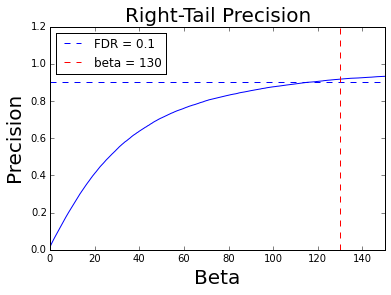

In [197]:
import matplotlib.pyplot as plt


right_xmin = 0
right_xmax = 150
right_threshold = 130

fig = plt.figure()
plt.plot(beta_space, right_precisions)
plt.xlim(right_xmin,right_xmax)
plt.axhline(y=1 - fdr, linestyle='dashed', label="FDR = " + str(fdr))
plt.axvline(x=right_threshold, color = 'red', linestyle='dashed', label="beta = " + str(right_threshold))
plt.title("Right-Tail Precision", fontsize=20)
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Precision", fontsize=20)
plt.legend(loc='best')
fig.savefig(right_precision_file)
print "Plot saved to ", right_precision_file
plt.show()

Plot saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-2_beta-t-2_Left-Precision


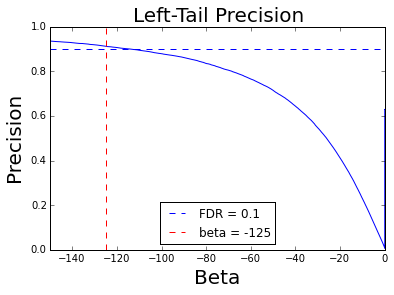

0

In [198]:
left_xmin = -150
left_xmax = 0
left_threshold = -125


fig = plt.figure()
plt.plot(beta_space, left_precisions)
plt.title("Left-Tail Precision", fontsize=20)
plt.xlim(left_xmin, left_xmax)
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Precision", fontsize=20)
plt.axhline(y=1 - fdr, linestyle='dashed', label="FDR = " + str(fdr))
plt.axvline(x=left_threshold, color = 'red', linestyle='dashed', label="beta = " + str(left_threshold))
plt.legend(loc='best')
fig.savefig(left_precision_file)
print "Plot saved to ", left_precision_file
plt.show()


import os
os.system("say 'finished'")

In [199]:
print len(np.where(just_sig_betas > right_threshold)[0])
print len(np.where(just_sig_betas < left_threshold)[0])

1142
1112


In [191]:
# Let's create these matrices
import numpy as np


under_indices = np.where(np.logical_or(np.logical_not(sig_matr), np.logical_and(beta_matr <= right_threshold, beta_matr >= left_threshold)))
print "Num significant ", beta_matr.shape[0] * beta_matr.shape[1] - len(under_indices[0])

thresh_matr = beta_matr[:,:]
thresh_matr[under_indices] = 0
print "Second check: num sig", len(np.where(thresh_matr)[0])

Num significant  2254
Second check: num sig 2254


In [205]:
print "Thresholded matrix file saved to ", fdr_file

save_gene_matrix(filename=fdr_file, matrix=thresh_matr, genes=genes)

with open(readme_file, 'w') as f:

    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nRight Threshold: "+ str(right_threshold))
    f.write("\nLeft Threshold: " + str(left_threshold))

print "Readme file written to ", readme_file

Thresholded matrix file saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-2_beta-t-2_thresh-FDR-0.1.txt
Readme file written to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-2_beta-t-2__README.txt


# Write original and threshold matrices, lag 3, t-3

In [239]:
import matplotlib.pyplot as plt

fdr = 0.1
lag = 3
t = 3
index = lag - 1
num = t - 1

prefix = "../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-" + str(index + 1) + "_beta-t-" + str(num + 1) + "_"
fdr_file = prefix + "thresh-FDR-" + str(fdr) + ".txt"
matrix_file = prefix + "no-thresh.txt"
rand_matrix_file = prefix + "null.txt"
left_precision_file = prefix + "Left-Precision"
right_precision_file = prefix + "Right-Precision"
readme_file = prefix + "_README.txt"

beta_matr = betas[index][:, :, num]
rand_beta_matr = rand_betas[index][:, :, num]
sig_matr = sigs[index]

genes = data["gene"]
rand_genes = rand_data["gene"]

just_sig_betas = beta_matr[np.where(sigs[index])]

not_rand_just_sig_betas = rand_beta_matr[np.where(np.logical_not(rand_sigs[index]))]


print "Beta Matrix of lag ", index + 1, "and num", num + 1, "saved to ", matrix_file
save_gene_matrix(matrix=beta_matr, filename=matrix_file, genes=genes)

print "Rand Matrix of lag", index + 1, "and num", num + 1, " saved to ", rand_matrix_file
save_gene_matrix(matrix=rand_beta_matr, filename=rand_matrix_file, genes=rand_genes)

print "Using original"
print "Trying to have an FDR of ", fdr
print "Taking the ", num + 1, "-th previous timepoint"

from statsmodels.distributions.empirical_distribution import ECDF

sig_cdf = ECDF(just_sig_betas)
not_sig_cdf = ECDF(not_rand_just_sig_betas)


all_betas = np.concatenate((just_sig_betas, not_rand_just_sig_betas))
beta_space = np.sort(all_betas)

left_precisions = [sig_cdf(beta)/(sig_cdf(beta) + not_sig_cdf(beta)) for beta in beta_space]
right_precisions = [(1 - sig_cdf(beta)) / (2.0 - sig_cdf(beta) - not_sig_cdf(beta)) for beta in beta_space]

import os
os.system("say 'finished'")

Beta Matrix of lag  3 and num 3 saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-3_beta-t-3_no-thresh.txt
Rand Matrix of lag 3 and num 3  saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-3_beta-t-3_null.txt
Using original
Trying to have an FDR of  0.1
Taking the  3 -th previous timepoint


0

Plot saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-3_beta-t-3_Right-Precision


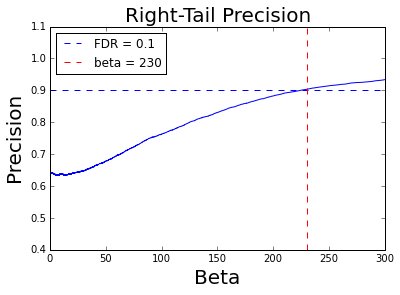

In [241]:
import matplotlib.pyplot as plt


right_xmin = 0
right_xmax = 300
right_threshold = 230

fig = plt.figure()
plt.plot(beta_space, right_precisions)
plt.xlim(right_xmin,right_xmax)
plt.axhline(y=1 - fdr, linestyle='dashed', label="FDR = " + str(fdr))
plt.axvline(x=right_threshold, color = 'red', linestyle='dashed', label="beta = " + str(right_threshold))
plt.title("Right-Tail Precision", fontsize=20)
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Precision", fontsize=20)
plt.legend(loc='best')
fig.savefig(right_precision_file)
print "Plot saved to ", right_precision_file
plt.show()

Plot saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-3_beta-t-3_Left-Precision


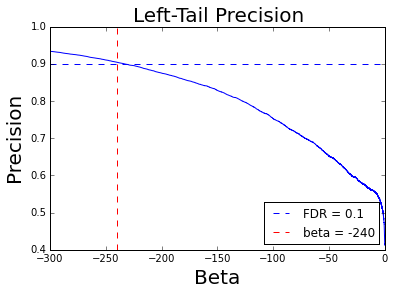

0

In [244]:
left_xmin = -300
left_xmax = 0
left_threshold = -240


fig = plt.figure()
plt.plot(beta_space, left_precisions)
plt.title("Left-Tail Precision", fontsize=20)
plt.xlim(left_xmin, left_xmax)
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Precision", fontsize=20)
plt.axhline(y=1 - fdr, linestyle='dashed', label="FDR = " + str(fdr))
plt.axvline(x=left_threshold, color = 'red', linestyle='dashed', label="beta = " + str(left_threshold))
plt.legend(loc='best')
fig.savefig(left_precision_file)
print "Plot saved to ", left_precision_file
plt.show()


import os
os.system("say 'finished'")

In [245]:
print len(np.where(just_sig_betas > right_threshold)[0])
print len(np.where(just_sig_betas < left_threshold)[0])

862
843


In [246]:
# Let's create these matrices
import numpy as np


under_indices = np.where(np.logical_or(np.logical_not(sig_matr), np.logical_and(beta_matr <= right_threshold, beta_matr >= left_threshold)))
print "Num significant ", beta_matr.shape[0] * beta_matr.shape[1] - len(under_indices[0])

thresh_matr = beta_matr[:,:]
thresh_matr[under_indices] = 0
print "Second check: num sig", len(np.where(thresh_matr)[0])

Num significant  1705
Second check: num sig 1705


In [247]:
print "Thresholded matrix file saved to ", fdr_file

save_gene_matrix(filename=fdr_file, matrix=thresh_matr, genes=genes)

with open(readme_file, 'w') as f:

    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nRight Threshold: "+ str(right_threshold))
    f.write("\nLeft Threshold: " + str(left_threshold))

print "Readme file written to ", readme_file

Thresholded matrix file saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-3_beta-t-3_thresh-FDR-0.1.txt
Readme file written to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-3_beta-t-3__README.txt


# Write original and threshold matrices, lag 3, t-2

In [231]:
import matplotlib.pyplot as plt

fdr = 0.1
lag = 3
t = 2
index = lag - 1
num = t - 1

prefix = "../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-" + str(index + 1) + "_beta-t-" + str(num + 1) + "_"
fdr_file = prefix + "thresh-FDR-" + str(fdr) + ".txt"
matrix_file = prefix + "no-thresh.txt"
rand_matrix_file = prefix + "null.txt"
left_precision_file = prefix + "Left-Precision"
right_precision_file = prefix + "Right-Precision"
readme_file = prefix + "_README.txt"

beta_matr = betas[index][:, :, num]
rand_beta_matr = rand_betas[index][:, :, num]
sig_matr = sigs[index]

genes = data["gene"]
rand_genes = rand_data["gene"]

just_sig_betas = beta_matr[np.where(sigs[index])]

not_rand_just_sig_betas = rand_beta_matr[np.where(np.logical_not(rand_sigs[index]))]


print "Beta Matrix of lag ", index + 1, "and num", num + 1, "saved to ", matrix_file
save_gene_matrix(matrix=beta_matr, filename=matrix_file, genes=genes)

print "Rand Matrix of lag", index + 1, "and num", num + 1, " saved to ", rand_matrix_file
save_gene_matrix(matrix=rand_beta_matr, filename=rand_matrix_file, genes=rand_genes)

print "Using original"
print "Trying to have an FDR of ", fdr
print "Taking the ", num + 1, "-th previous timepoint"

from statsmodels.distributions.empirical_distribution import ECDF

sig_cdf = ECDF(just_sig_betas)
not_sig_cdf = ECDF(not_rand_just_sig_betas)


all_betas = np.concatenate((just_sig_betas, not_rand_just_sig_betas))
beta_space = np.sort(all_betas)

left_precisions = [sig_cdf(beta)/(sig_cdf(beta) + not_sig_cdf(beta)) for beta in beta_space]
right_precisions = [(1 - sig_cdf(beta)) / (2.0 - sig_cdf(beta) - not_sig_cdf(beta)) for beta in beta_space]

import os
os.system("say 'finished'")

Beta Matrix of lag  3 and num 2 saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-3_beta-t-2_no-thresh.txt
Rand Matrix of lag 3 and num 2  saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-3_beta-t-2_null.txt
Using original
Trying to have an FDR of  0.1
Taking the  2 -th previous timepoint


0

Plot saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-3_beta-t-2_Right-Precision


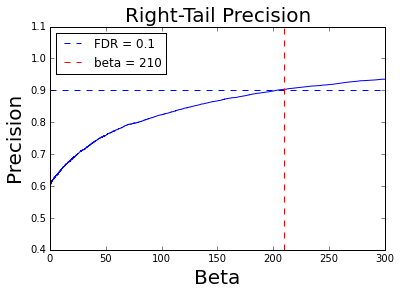

In [233]:
import matplotlib.pyplot as plt


right_xmin = 0
right_xmax = 300
right_threshold = 210

fig = plt.figure()
plt.plot(beta_space, right_precisions)
plt.xlim(right_xmin,right_xmax)
plt.axhline(y=1 - fdr, linestyle='dashed', label="FDR = " + str(fdr))
plt.axvline(x=right_threshold, color = 'red', linestyle='dashed', label="beta = " + str(right_threshold))
plt.title("Right-Tail Precision", fontsize=20)
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Precision", fontsize=20)
plt.legend(loc='best')
fig.savefig(right_precision_file)
print "Plot saved to ", right_precision_file
plt.show()

Plot saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-3_beta-t-2_Left-Precision


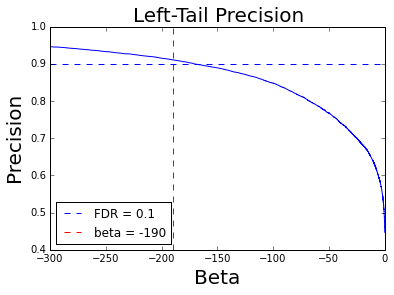

0

In [235]:
left_xmin = -300
left_xmax = 0
left_threshold = -190


fig = plt.figure()
plt.plot(beta_space, left_precisions)
plt.title("Left-Tail Precision", fontsize=20)
plt.xlim(left_xmin, left_xmax)
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Precision", fontsize=20)
plt.axhline(y=1 - fdr, linestyle='dashed', label="FDR = " + str(fdr))
plt.axvline(x=left_threshold, color = 'red', linestyle='dashed', label="beta = " + str(left_threshold))
plt.legend(loc='best')
fig.savefig(left_precision_file)
print "Plot saved to ", left_precision_file
plt.show()


import os
os.system("say 'finished'")

In [236]:
print len(np.where(just_sig_betas > right_threshold)[0])
print len(np.where(just_sig_betas < left_threshold)[0])

1031
1322


In [237]:
# Let's create these matrices
import numpy as np


under_indices = np.where(np.logical_or(np.logical_not(sig_matr), np.logical_and(beta_matr <= right_threshold, beta_matr >= left_threshold)))
print "Num significant ", beta_matr.shape[0] * beta_matr.shape[1] - len(under_indices[0])

thresh_matr = beta_matr[:,:]
thresh_matr[under_indices] = 0
print "Second check: num sig", len(np.where(thresh_matr)[0])

Num significant  2353
Second check: num sig 2353


In [238]:
print "Thresholded matrix file saved to ", fdr_file

save_gene_matrix(filename=fdr_file, matrix=thresh_matr, genes=genes)

with open(readme_file, 'w') as f:

    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nRight Threshold: "+ str(right_threshold))
    f.write("\nLeft Threshold: " + str(left_threshold))

print "Readme file written to ", readme_file

Thresholded matrix file saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-3_beta-t-2_thresh-FDR-0.1.txt
Readme file written to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-3_beta-t-2__README.txt


# Write original and threshold matrices, lag 3, t-1

In [224]:
import matplotlib.pyplot as plt

fdr = 0.1
lag = 3
t = 1
index = lag - 1
num = t - 1

prefix = "../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-" + str(index + 1) + "_beta-t-" + str(num + 1) + "_"
fdr_file = prefix + "thresh-FDR-" + str(fdr) + ".txt"
matrix_file = prefix + "no-thresh.txt"
rand_matrix_file = prefix + "null.txt"
left_precision_file = prefix + "Left-Precision"
right_precision_file = prefix + "Right-Precision"
readme_file = prefix + "_README.txt"

beta_matr = betas[index][:, :, num]
rand_beta_matr = rand_betas[index][:, :, num]
sig_matr = sigs[index]

genes = data["gene"]
rand_genes = rand_data["gene"]

just_sig_betas = beta_matr[np.where(sigs[index])]

not_rand_just_sig_betas = rand_beta_matr[np.where(np.logical_not(rand_sigs[index]))]


print "Beta Matrix of lag ", index + 1, "and num", num + 1, "saved to ", matrix_file
save_gene_matrix(matrix=beta_matr, filename=matrix_file, genes=genes)

print "Rand Matrix of lag", index + 1, "and num", num + 1, " saved to ", rand_matrix_file
save_gene_matrix(matrix=rand_beta_matr, filename=rand_matrix_file, genes=rand_genes)

print "Using original"
print "Trying to have an FDR of ", fdr
print "Taking the ", num + 1, "-th previous timepoint"

from statsmodels.distributions.empirical_distribution import ECDF

sig_cdf = ECDF(just_sig_betas)
not_sig_cdf = ECDF(not_rand_just_sig_betas)


all_betas = np.concatenate((just_sig_betas, not_rand_just_sig_betas))
beta_space = np.sort(all_betas)

left_precisions = [sig_cdf(beta)/(sig_cdf(beta) + not_sig_cdf(beta)) for beta in beta_space]
right_precisions = [(1 - sig_cdf(beta)) / (2.0 - sig_cdf(beta) - not_sig_cdf(beta)) for beta in beta_space]

import os
os.system("say 'finished'")

Beta Matrix of lag  3 and num 1 saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-3_beta-t-1_no-thresh.txt
Rand Matrix of lag 3 and num 1  saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-3_beta-t-1_null.txt
Using original
Trying to have an FDR of  0.1
Taking the  1 -th previous timepoint


0

Plot saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-3_beta-t-1_Right-Precision


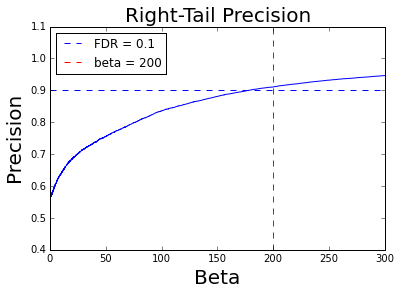

In [226]:
import matplotlib.pyplot as plt


right_xmin = 0
right_xmax = 300
right_threshold = 200

fig = plt.figure()
plt.plot(beta_space, right_precisions)
plt.xlim(right_xmin,right_xmax)
plt.axhline(y=1 - fdr, linestyle='dashed', label="FDR = " + str(fdr))
plt.axvline(x=right_threshold, color = 'red', linestyle='dashed', label="beta = " + str(right_threshold))
plt.title("Right-Tail Precision", fontsize=20)
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Precision", fontsize=20)
plt.legend(loc='best')
fig.savefig(right_precision_file)
print "Plot saved to ", right_precision_file
plt.show()

Plot saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-3_beta-t-1_Left-Precision


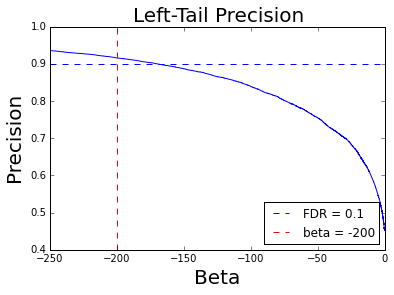

0

In [227]:
left_xmin = -250
left_xmax = 0
left_threshold = -200


fig = plt.figure()
plt.plot(beta_space, left_precisions)
plt.title("Left-Tail Precision", fontsize=20)
plt.xlim(left_xmin, left_xmax)
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Precision", fontsize=20)
plt.axhline(y=1 - fdr, linestyle='dashed', label="FDR = " + str(fdr))
plt.axvline(x=left_threshold, color = 'red', linestyle='dashed', label="beta = " + str(left_threshold))
plt.legend(loc='best')
fig.savefig(left_precision_file)
print "Plot saved to ", left_precision_file
plt.show()


import os
os.system("say 'finished'")

In [228]:
print len(np.where(just_sig_betas > right_threshold)[0])
print len(np.where(just_sig_betas < left_threshold)[0])

1077
1212


In [229]:
# Let's create these matrices
import numpy as np


under_indices = np.where(np.logical_or(np.logical_not(sig_matr), np.logical_and(beta_matr <= right_threshold, beta_matr >= left_threshold)))
print "Num significant ", beta_matr.shape[0] * beta_matr.shape[1] - len(under_indices[0])

thresh_matr = beta_matr[:,:]
thresh_matr[under_indices] = 0
print "Second check: num sig", len(np.where(thresh_matr)[0])

Num significant  2289
Second check: num sig 2289


In [230]:
print "Thresholded matrix file saved to ", fdr_file

save_gene_matrix(filename=fdr_file, matrix=thresh_matr, genes=genes)

with open(readme_file, 'w') as f:

    f.write("Genes: " + str(len(genes)))
    f.write("\nPairs: " + str(beta_matr.shape[0] * beta_matr.shape[1]))
    f.write("\nSignificant: " + str(len(np.where(thresh_matr)[0])))
    f.write("\n% Significant: " + str(len(np.where(thresh_matr)[0]) * 100.0 /(beta_matr.shape[0] * beta_matr.shape[1])) )
    f.write("\nLag: " + str(index + 1))
    f.write("\nCoefficient of: x_{t-"+ str(num + 1) + "}")
    f.write("\nFDR: "+ str(fdr))
    f.write("\nRight Threshold: "+ str(right_threshold))
    f.write("\nLeft Threshold: " + str(left_threshold))

print "Readme file written to ", readme_file

Thresholded matrix file saved to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-3_beta-t-1_thresh-FDR-0.1.txt
Readme file written to  ../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-3_beta-t-1__README.txt


# Original Analyses-- ignore

# Write FDR matrix for lag 1

In [46]:

import matplotlib.pyplot as plt
print "Using averages"


just_sig_betas = avg_betas[0][np.where(sigs[0])]
some_sig_betas = avg_betas[0][np.where(some_sig_matr)]
all_sig_betas = avg_betas[0][np.where(all_sig_matr)]


not_rand_sig_betas = avg_rand_betas[0][np.where(not_rand_sig_matr)]
not_rand_just_sig_betas = avg_rand_betas[0][np.where(np.logical_not(rand_sigs[0]))]

bottom_threshold = np.min(just_sig_betas[np.where( just_sig_betas > 0)])
top_threshold = np.max(just_sig_betas[np.where(just_sig_betas < 0)])
print "Bottom threshold is ", bottom_threshold
print "top threshold is ", top_threshold

Using averages
Bottom threshold is  0.000302422631865
top threshold is  -0.000434239702135


In [51]:
from statsmodels.distributions.empirical_distribution import ECDF

sig_cdf = ECDF(just_sig_betas)
not_sig_cdf = ECDF(not_rand_just_sig_betas)

all_betas = np.concatenate((just_sig_betas, not_rand_just_sig_betas))
beta_space = np.sort(all_betas)

left_precisions = [sig_cdf(beta)/(sig_cdf(beta) + not_sig_cdf(beta)) for beta in beta_space]
right_precisions = [(1 - sig_cdf(beta)) / (2.0 - sig_cdf(beta) - not_sig_cdf(beta)) for beta in beta_space]
print beta_space[-5:-1]
print right_precisions[-5:-1]


[  4.95162215e+13   5.18809722e+13   5.87898352e+13   7.53564455e+13]
[0.9999999999938417, 1.0, 1.0000000000123166, 1.0000000000246332]


In [52]:
print beta_space[-100:-95]
print sig_cdf(beta_space[-100:-95])
print right_precisions[-100:-95]

[  8.79133878e+12   8.80111278e+12   8.86467317e+12   8.94561520e+12
   8.97063087e+12]
[ 0.9995538   0.99955831  0.99956282  0.99956733  0.99957183]
[0.9999999999997512, 1.0, 1.000000000000254, 1.0000000000002567, 1.0]


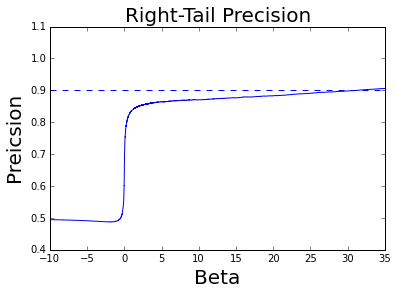

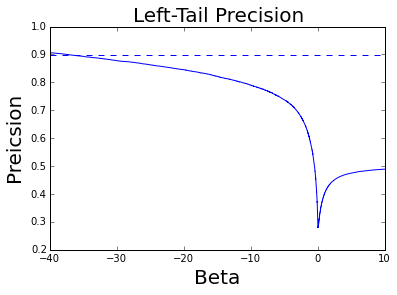

In [58]:
import matplotlib.pyplot as plt

plt.plot(beta_space, right_precisions)
plt.xlim(-10,35)
plt.axhline(y=0.9, linestyle='dashed')
plt.title("Right-Tail Precision", fontsize=20)
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Preicsion", fontsize=20)
plt.show()

plt.plot(beta_space, left_precisions)
plt.title("Left-Tail Precision", fontsize=20)
plt.xlim(-40, 10)
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Preicsion", fontsize=20)
plt.axhline(y=0.9, linestyle='dashed')
plt.show()

# Using cutoffs of 35 and -35 will hav a precision of 0.90, or FDR of 0.1

In [61]:
print len(np.where(just_sig_betas > 35)[0])
print len(np.where(just_sig_betas < -40)[0])

2383
1893


In [62]:
# Let's create these matrices
import numpy as np

lag1_sig_matr = np.logical_and(sigs[0], np.logical_or(avg_betas[0] > 35, avg_betas[0] < -40))
print "Num significant ", len(np.where(lag1_sig_matr)[0])
np.save("../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-1-FDR-0.1", lag1_sig_matr)


Num significant  4276


# Write FDR matrix for lag 2

In [78]:

import matplotlib.pyplot as plt
print "Using averages"


just_sig_betas = avg_betas[1][np.where(sigs[1])]
some_sig_betas = avg_betas[1][np.where(some_sig_matr)]
all_sig_betas = avg_betas[1][np.where(all_sig_matr)]


not_rand_sig_betas = avg_rand_betas[1][np.where(not_rand_sig_matr)]
not_rand_just_sig_betas = avg_rand_betas[1][np.where(np.logical_not(rand_sigs[1]))]

bottom_threshold = np.min(just_sig_betas[np.where( just_sig_betas > 0)])
top_threshold = np.max(just_sig_betas[np.where(just_sig_betas < 0)])
print "Bottom threshold is ", bottom_threshold
print "top threshold is ", top_threshold

Using averages
Bottom threshold is  6.17229272963e-06
top threshold is  -8.24179067214e-06


In [79]:
from statsmodels.distributions.empirical_distribution import ECDF

sig_cdf = ECDF(just_sig_betas)
not_sig_cdf = ECDF(not_rand_just_sig_betas)

all_betas = np.concatenate((just_sig_betas, not_rand_just_sig_betas))
beta_space = np.sort(all_betas)

left_precisions = [sig_cdf(beta)/(sig_cdf(beta) + not_sig_cdf(beta)) for beta in beta_space]
right_precisions = [(1 - sig_cdf(beta)) / (2.0 - sig_cdf(beta) - not_sig_cdf(beta)) for beta in beta_space]
print beta_space[-5:-1]
print right_precisions[-5:-1]


[  4.18017664e+13   4.18031136e+13   4.81264398e+13   4.82702404e+13]
[1.0000000000075491, 1.0, 1.0, 0.99999999996980349]


In [80]:
print beta_space[-100:-95]
print sig_cdf(beta_space[-100:-95])
print right_precisions[-100:-95]

[  6.56860255e+12   6.65114217e+12   6.67876209e+12   6.70889281e+12
   6.71773134e+12]
[ 0.99963601  0.99963969  0.99964336  0.99964704  0.99965072]
[1.0, 1.0, 0.99999999999968869, 0.99999999999968547, 1.0]


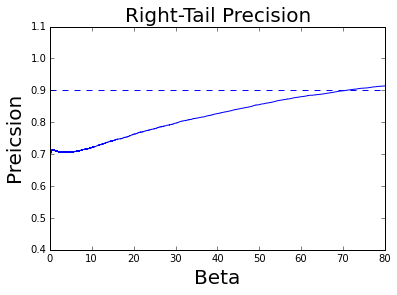

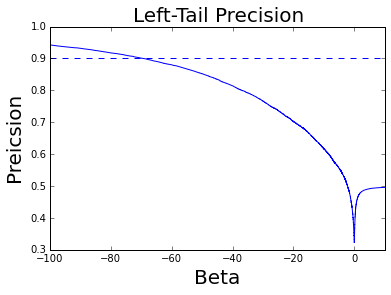

In [84]:
import matplotlib.pyplot as plt

plt.plot(beta_space, right_precisions)
plt.xlim(0, 80)
plt.axhline(y=0.9, linestyle='dashed')
plt.title("Right-Tail Precision", fontsize=20)
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Preicsion", fontsize=20)
plt.show()

plt.plot(beta_space, left_precisions)
plt.title("Left-Tail Precision", fontsize=20)
plt.xlim(-100, 10)
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Preicsion", fontsize=20)
plt.axhline(y=0.9, linestyle='dashed')
plt.show()

# Using cutoffs of 35 and -35 will hav a precision of 0.90, or FDR of 0.1

In [85]:
print len(np.where(just_sig_betas > 70)[0])
print len(np.where(just_sig_betas < -70)[0])

1447
1424


In [86]:
# Let's create these matrices
import numpy as np

lag2_sig_matr = np.logical_and(sigs[1], np.logical_or(avg_betas[1] > 70, avg_betas[1] < -70))
print "Num significant ", len(np.where(lag2_sig_matr)[0])
np.save("../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-2-FDR-0.1", lag2_sig_matr)


Num significant  2871


# Write FDR matrix for lag 3

In [87]:

import matplotlib.pyplot as plt
print "Using averages"


just_sig_betas = avg_betas[2][np.where(sigs[2])]
some_sig_betas = avg_betas[2][np.where(some_sig_matr)]
all_sig_betas = avg_betas[2][np.where(all_sig_matr)]


not_rand_sig_betas = avg_rand_betas[2][np.where(not_rand_sig_matr)]
not_rand_just_sig_betas = avg_rand_betas[2][np.where(np.logical_not(rand_sigs[2]))]

bottom_threshold = np.min(just_sig_betas[np.where( just_sig_betas > 0)])
top_threshold = np.max(just_sig_betas[np.where(just_sig_betas < 0)])
print "Bottom threshold is ", bottom_threshold
print "top threshold is ", top_threshold

Using averages
Bottom threshold is  3.36208522926e-06
top threshold is  -1.55813977092e-05


In [88]:
from statsmodels.distributions.empirical_distribution import ECDF

sig_cdf = ECDF(just_sig_betas)
not_sig_cdf = ECDF(not_rand_just_sig_betas)

all_betas = np.concatenate((just_sig_betas, not_rand_just_sig_betas))
beta_space = np.sort(all_betas)

left_precisions = [sig_cdf(beta)/(sig_cdf(beta) + not_sig_cdf(beta)) for beta in beta_space]
right_precisions = [(1 - sig_cdf(beta)) / (2.0 - sig_cdf(beta) - not_sig_cdf(beta)) for beta in beta_space]
print beta_space[-5:-1]
print right_precisions[-5:-1]


[  4.57929742e+13   4.87951885e+13   6.69277798e+13   8.57304201e+13]
[1.0, 1.0, 1.0000000000108633, 0.9999999999782736]


In [89]:
print beta_space[-100:-95]
print sig_cdf(beta_space[-100:-95])
print right_precisions[-100:-95]

[  3.70269096e+12   3.70269096e+12   3.70269096e+12   3.70269096e+12
   3.70269096e+12]
[ 0.99951455  0.99951455  0.99951455  0.99951455  0.99951455]
[0.99999999999977129, 0.99999999999977129, 0.99999999999977129, 0.99999999999977129, 0.99999999999977129]


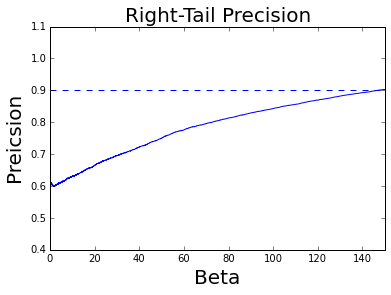

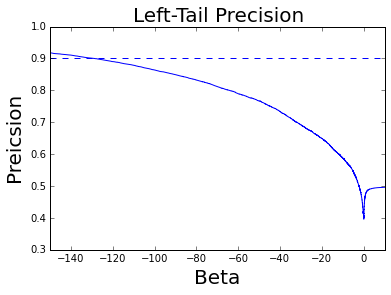

In [92]:
import matplotlib.pyplot as plt

plt.plot(beta_space, right_precisions)
plt.xlim(0, 150)
plt.axhline(y=0.9, linestyle='dashed')
plt.title("Right-Tail Precision", fontsize=20)
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Preicsion", fontsize=20)
plt.show()

plt.plot(beta_space, left_precisions)
plt.title("Left-Tail Precision", fontsize=20)
plt.xlim(-150, 10)
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Preicsion", fontsize=20)
plt.axhline(y=0.9, linestyle='dashed')
plt.show()

# Using cutoffs of 35 and -35 will hav a precision of 0.90, or FDR of 0.1

In [93]:
print len(np.where(just_sig_betas > 150)[0])
print len(np.where(just_sig_betas < -130)[0])

922
1146


In [94]:
# Let's create these matrices
import numpy as np

lag3_sig_matr = np.logical_and(sigs[2], np.logical_or(avg_betas[2] > 150, avg_betas[2] < -130))
print "Num significant ", len(np.where(lag3_sig_matr)[0])
np.save("../data/GeneExpressionData/NCRNA-extreme-change_matrices/Lag-3-FDR-0.1", lag3_sig_matr)


Num significant  2068


# Plot the lag-1 betas

In [ ]:

import matplotlib.pyplot as plt
print "Using averages"


just_sig_betas = avg_betas[0][np.where(sigs[0])]
some_sig_betas = avg_betas[0][np.where(some_sig_matr)]
all_sig_betas = avg_betas[0][np.where(all_sig_matr)]


not_rand_sig_betas = avg_rand_betas[0][np.where(not_rand_sig_matr)]
not_rand_just_sig_betas = avg_rand_betas[0][np.where(np.logical_not(rand_sigs[0]))]

bottom_threshold = np.min(just_sig_betas[np.where( just_sig_betas > 0)])
top_threshold = np.max(just_sig_betas[np.where(just_sig_betas < 0)])
print "Bottom threshold is ", bottom_threshold
print "top threshold is ", top_threshold

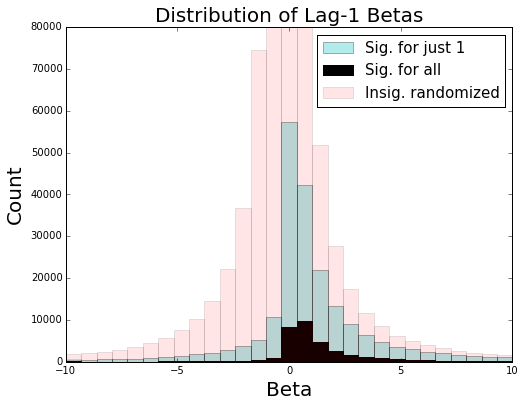

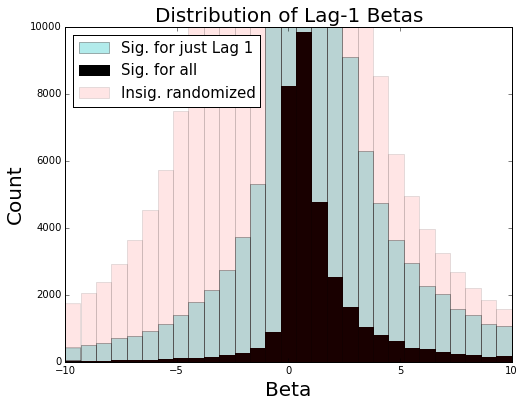

In [11]:
%matplotlib inline
plot_betas = np.concatenate((some_sig_betas, all_sig_betas, not_rand_sig_betas))

xmin = -10
xmax = 10
bins = np.linspace(xmin, xmax, 30)

plt.figure(figsize=(8,6))
plt.xlim(xmin, xmax)
plt.ylim(0,80000)
plt.hist(just_sig_betas, bins=bins, alpha=0.3, label="Sig. for just 1", color='c')
plt.hist(all_sig_betas,  bins=bins, alpha=1, label="Sig. for all", color='k')
plt.hist(not_rand_sig_betas, bins=bins, alpha=0.1, label="Insig. randomized", color='r')
# plt.axvline(x=bottom_threshold, color='k', linestyle='dashed', label="Threshold")
# plt.axvline(x=top_threshold, color='k', linestyle='dashed', label="Threshold")
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.legend(loc="best", fontsize=15)
plt.title("Distribution of Lag-1 Betas", fontsize=20)
plt.show()

plt.figure(figsize=(8,6))
plt.xlim(xmin, xmax)
plt.ylim(0,10000)
plt.hist(just_sig_betas, bins=bins, alpha=0.3, label="Sig. for just Lag 1", color='c')
plt.hist(all_sig_betas,  bins=bins, alpha=1, label="Sig. for all", color='k')
plt.hist(not_rand_sig_betas, bins=bins, alpha=0.1, label="Insig. randomized", color='r')
# plt.axvline(x=bottom_threshold, color='k', linestyle='dashed', label="Threshold")
# plt.axvline(x=top_threshold, color='k', linestyle='dashed', label="Threshold")
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.legend(loc="best", fontsize=15)
plt.title("Distribution of Lag-1 Betas", fontsize=20)
plt.show()

# Plot lag 2 betas-- max

In [67]:

import matplotlib.pyplot as plt
print "Using max"


just_sig_betas = max_betas[1][np.where(sigs[1])]
some_sig_betas = max_betas[1][np.where(some_sig_matr)]
all_sig_betas = max_betas[1][np.where(all_sig_matr)]

not_rand_sig_betas = max_rand_betas[1][np.where(not_rand_sig_matr)]

bottom_threshold = np.min(just_sig_betas[np.where( just_sig_betas > 0)])
top_threshold = np.max(just_sig_betas[np.where(just_sig_betas < 0)])
print "Bottom threshold is ", bottom_threshold
print "top threshold is ", top_threshold

Using max
Bottom threshold is  1.59344528724e-05
top threshold is  -1.68526322672e-05


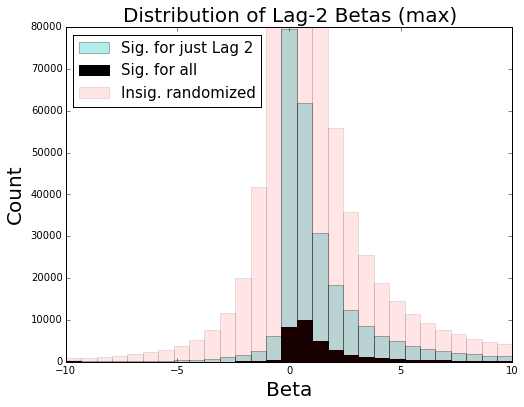

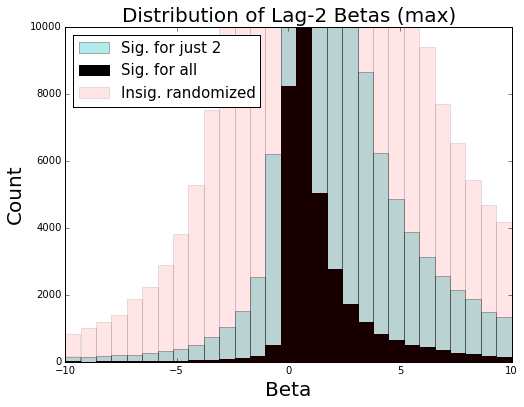

In [70]:
%matplotlib inline
#
xmin = -10
xmax = 10
bins = np.linspace(xmin, xmax, 30)

plt.figure(figsize=(8,6))
plt.xlim(xmin, xmax)
plt.ylim(0,80000)
plt.hist(just_sig_betas, bins=bins, alpha=0.3, label="Sig. for just Lag 2", color='c')
plt.hist(all_sig_betas,  bins=bins, alpha=1, label="Sig. for all", color='k')
plt.hist(not_rand_sig_betas, bins=bins, alpha=0.1, label="Insig. randomized", color='r')
# plt.axvline(x=bottom_threshold, color='k', linestyle='dashed', label="Threshold")
# plt.axvline(x=top_threshold, color='k', linestyle='dashed', label="Threshold")
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.legend(loc="best", fontsize=15)
plt.title("Distribution of Lag-2 Betas (max)", fontsize=20)
plt.show()


# fdr = 0.1

# print "FDR at ", fdr, "is at "


# def get_fdr()

# Plot lag 3 betas-- max

In [71]:

import matplotlib.pyplot as plt
print "Using max"


just_sig_betas = max_betas[2][np.where(sigs[2])]
some_sig_betas = max_betas[2][np.where(some_sig_matr)]
all_sig_betas = max_betas[2][np.where(all_sig_matr)]

not_rand_sig_betas = max_rand_betas[2][np.where(not_rand_sig_matr)]

bottom_threshold = np.min(just_sig_betas[np.where( just_sig_betas > 0)])
top_threshold = np.max(just_sig_betas[np.where(just_sig_betas < 0)])
print "Bottom threshold is ", bottom_threshold
print "top threshold is ", top_threshold

Using max
Bottom threshold is  5.42743758561e-07
top threshold is  -5.35727296088e-06


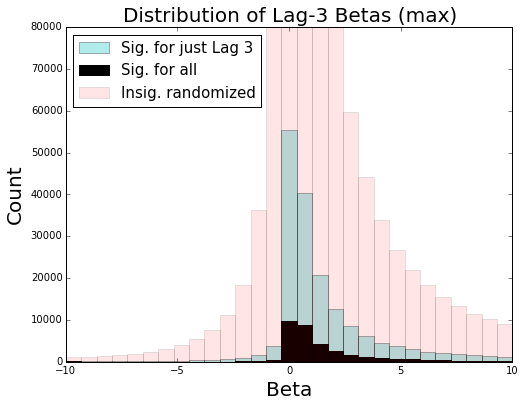

In [73]:
%matplotlib inline
#
xmin = -10
xmax = 10
bins = np.linspace(xmin, xmax, 30)

plt.figure(figsize=(8,6))
plt.xlim(xmin, xmax)
plt.ylim(0,80000)
plt.hist(just_sig_betas, bins=bins, alpha=0.3, label="Sig. for just Lag 3", color='c')
plt.hist(all_sig_betas,  bins=bins, alpha=1, label="Sig. for all", color='k')
plt.hist(not_rand_sig_betas, bins=bins, alpha=0.1, label="Insig. randomized", color='r')
# plt.axvline(x=bottom_threshold, color='k', linestyle='dashed', label="Threshold")
# plt.axvline(x=top_threshold, color='k', linestyle='dashed', label="Threshold")
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.legend(loc="best", fontsize=15)
plt.title("Distribution of Lag-3 Betas (max)", fontsize=20)
plt.show()


# fdr = 0.1

# print "FDR at ", fdr, "is at "




In [84]:
import numpy as np

np.cumsum([1,2,3])

array([1, 3, 6])

# Plot the sig and insig for model order 1

CPU times: user 6.57 s, sys: 105 ms, total: 6.68 s
Wall time: 6.82 s
CPU times: user 1min 10s, sys: 890 ms, total: 1min 11s
Wall time: 1min 12s
ENSG00000243485.3 ENSG00000230415.1
ENSG00000231830.1 ENSG00000278044.1


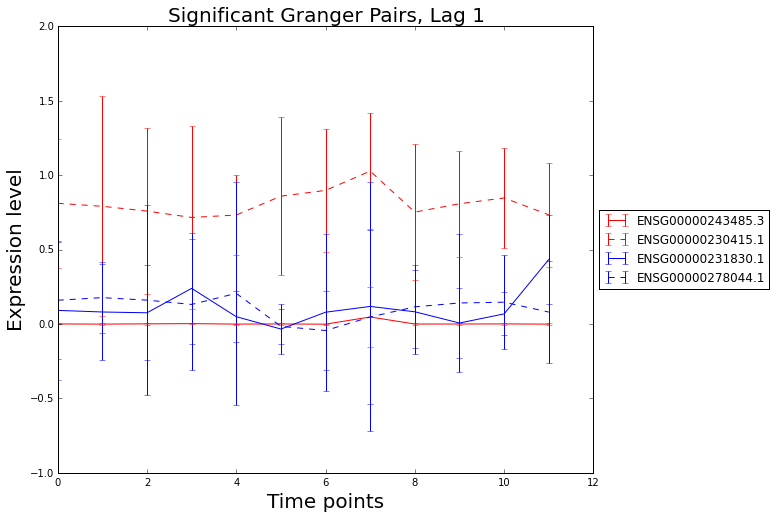

ENSG00000243485.3 ENSG00000231709.1
ENSG00000243485.3 ENSG00000239664.2


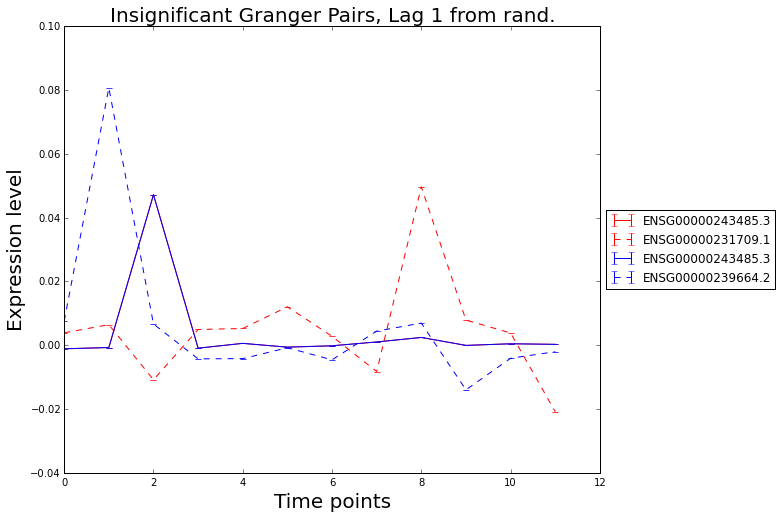

CPU times: user 9.08 s, sys: 462 ms, total: 9.55 s
Wall time: 10.4 s
CPU times: user 1min 15s, sys: 1.51 s, total: 1min 17s
Wall time: 1min 20s
ENSG00000243485.3 ENSG00000235263.1
ENSG00000231830.1 ENSG00000230051.1


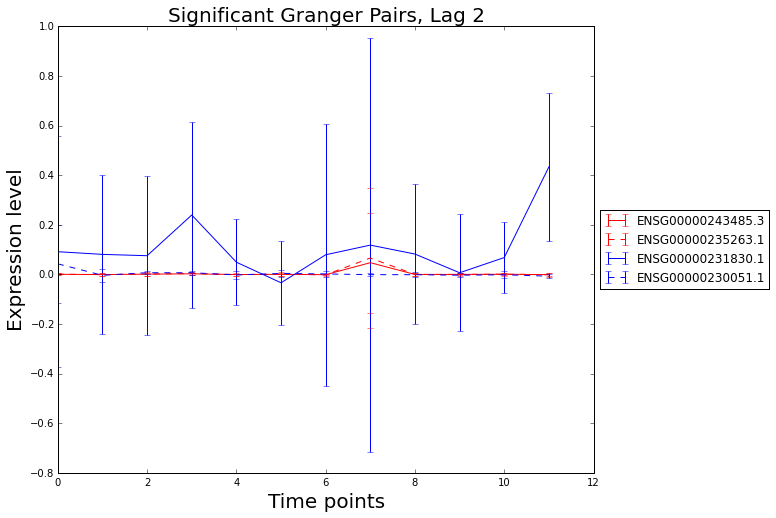

ENSG00000243485.3 ENSG00000231709.1
ENSG00000243485.3 ENSG00000239664.2


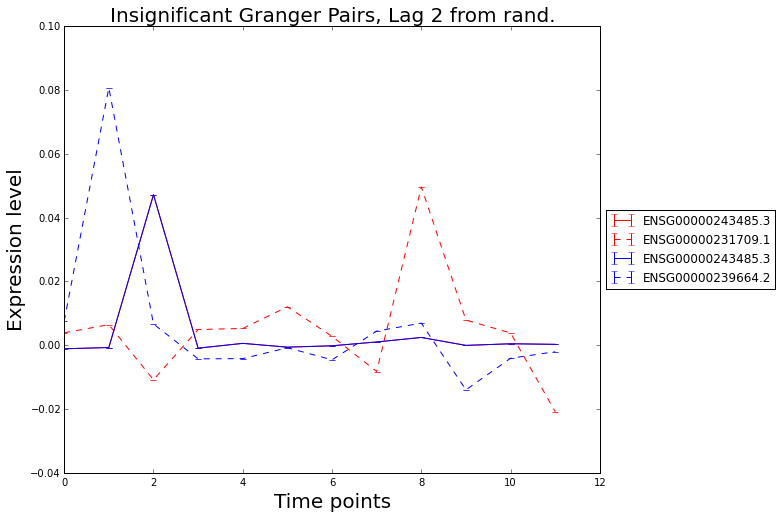

CPU times: user 6.36 s, sys: 126 ms, total: 6.49 s
Wall time: 6.82 s
CPU times: user 1min 22s, sys: 1.54 s, total: 1min 24s
Wall time: 1min 31s
ENSG00000243485.3 ENSG00000238186.1
ENSG00000231830.1 ENSG00000279184.1


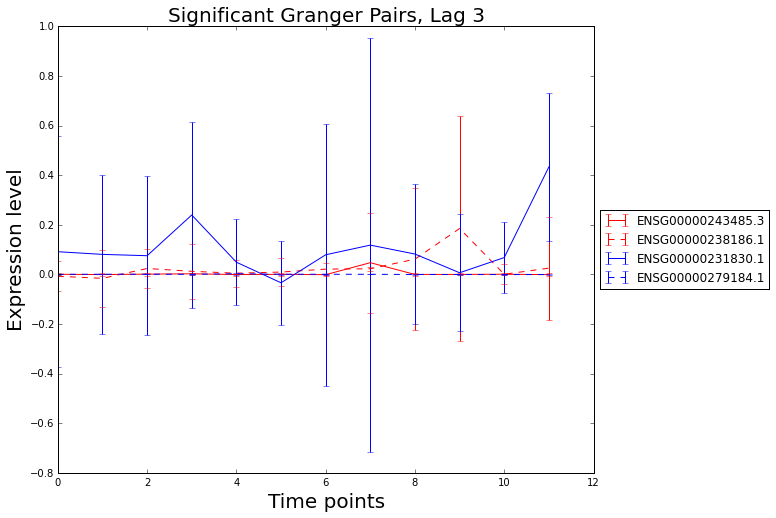

ENSG00000243485.3 ENSG00000231709.1
ENSG00000243485.3 ENSG00000239664.2


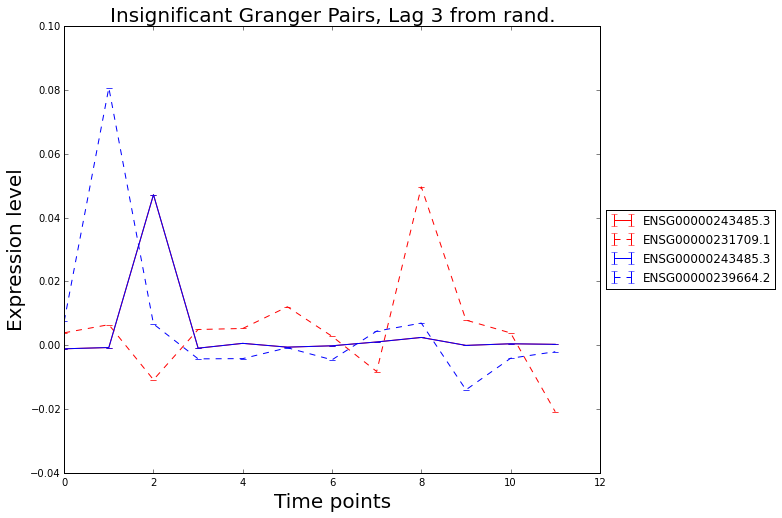

In [83]:


model_orders = range(1,4)

for model_order in model_orders:
    index = model_order - 1
    %time sig_pairs = gtm.get_sig_gene_pairs(sigs[index], data["gene"])

    %time rand_notsig_pairs = gtm.get_sig_gene_pairs(~ rand_sigs[index], rand_data["gene"])

    plot_pairs = sig_pairs[1:2] + sig_pairs[-2:-1]
    gtm.plot_gene_pairs(data, plot_pairs, title="Significant Granger Pairs, Lag "+ str(model_order))



    plot_pairs = rand_notsig_pairs[1:2] + rand_notsig_pairs[-2:-1]
    gtm.plot_gene_pairs(rand_data, rand_notsig_pairs[1:3], title="Insignificant Granger Pairs, Lag " + str(model_order) + " from rand.")

# Plot all signfiicant granger pairs

In [ ]:



all_sig_pairs = gtm.get_sig_gene_pairs(all_sig_matr, data["gene"])
plot_pairs = all_sig_pairs[1:2] + all_sig_pairs[-2:-1]
gtm.plot_gene_pairs(data, plot_pairs, title="All-Significant Granger Pairs"+ str(model_order))